### Table of Contents:
- __1.__ Introduction
- __2.__ Loading the dataset and deleting column "ACCLASS"
- __3.__ Exploring our target variable
- __4.__ Variable types, identifying numerical and categorical variables
- __5.__ Identifying missing values
- __6.__ Relationship between missing data and target
- __7.__ Exploring DATE variable
- __8.__ Exporing Discrete variables
- __9.__ Exploring Continuous variables
- __10.__ Split dataset into train and test subsets
- __11.__ Create date columns
- __12.__ Standard Scaling and One-Hot Encoding
- __13.__ Building the model

### 1. Introduction

**Project Goal**

The project's goal is to build a Binary classification model based on certain features would predict if the incident would result in fatality or not
This is a classification problem.
**Importance:**

The significance for this team  lies in its potential of create a Supervised learning using Sklearn, applying all resources and techniques seen in classes.

**Objective of the Machine Learning Model:**

Our goal is to minimize the disparity between the actual value and the  estimated by our model. The performance of the model will be assessed using the following metrics:

- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-squared (R2).

In [3]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')
import plotly.graph_objs as go
import xgboost as xgb
import lightgbm as lgb
import scipy.stats as stats

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout


In [6]:
df = pd.read_csv("/Users/rathanrajdasari/Downloads/Intro AI/train.csv")
dft = pd.read_csv("/Users/rathanrajdasari/Downloads/Intro AI/test.csv")
train=df

In [7]:
# Finding records with multiple null values in rows where 'acclass' is 'Non-Fatal Injury' and null count > 20
multiple_nulls = (df['ACCLASS'] == 'Non-Fatal Injury') & (df.isnull().sum(axis=1) > 20)
records_with_multiple_nulls = df[multiple_nulls]
records_with_multiple_nulls.shape

(5440, 54)

### ACCLASS

In [10]:
# Checking the balance of values in acclass again
df.ACCLASS.value_counts()

ACCLASS
Non-Fatal Injury    12978
Fatal                2022
Name: count, dtype: int64

(array([12978.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2022.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

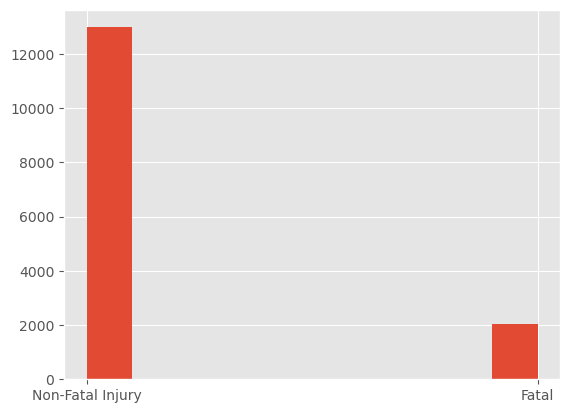

In [12]:
#plotting histogram 
plt.hist(df.ACCLASS)

#### From the above histogram, we can see that there is a high frequency for Non-Fatal injury values than Fatal ones

In [13]:
#Columns with YES values, we would like to fill the null values with 'NO'
binary_valued_cols = ['PEDESTRIAN','CYCLIST','AUTOMOBILE','MOTORCYCLE','TRUCK',
'TRSN_CITY_VEH',
'EMERG_VEH',
'PASSENGER',
'SPEEDING',
'AG_DRIV',
'REDLIGHT',
'ALCOHOL',
'DISABILITY']

for i in binary_valued_cols:
    df[i]=df[i].fillna('No')
    #test[i]=test[i].fillna('No')

In [14]:
#Columns with YES values, we would like to fill the null values with 'NO'
binary_valued_cols_test = ['PEDESTRIAN','CYCLIST','AUTOMOBILE','MOTORCYCLE','TRUCK',
'TRSN_CITY_VEH',
'EMERG_VEH',
'PASSENGER',
'SPEEDING',
'AG_DRIV',
'REDLIGHT',
'ALCOHOL',
'DISABILITY']

for i in binary_valued_cols_test:
    dft[i]=dft[i].fillna('No')
    #test[i]=test[i].fillna('No')

In [15]:
# processing the null value by MAR with relevanent 

### DISTRICT

In [16]:
print('Number of missing values in DISTRICT column are ',df['DISTRICT'].isna().sum())

Number of missing values in DISTRICT column are  16


In [17]:
print('Number of missing values in DISTRICT column are ',dft['DISTRICT'].isna().sum())

Number of missing values in DISTRICT column are  213


In [18]:
#Checking the STREET1, STREET2 values for the missing values of the DISTRICT
df[df['DISTRICT'].isna()][['DISTRICT','STREET1','STREET2']]

,DISTRICT,STREET1,STREET2
11192,NaN,WILLIAM R ALLEN RD,SHEPPARD AVE W
11193,NaN,WILLIAM R ALLEN RD,SHEPPARD AVE W
11796,NaN,71 MCCOOL CRT,NaN
12025,NaN,DON VALLEY PARKWAY N,DON MILLS RD
12026,NaN,DON VALLEY PARKWAY N,DON MILLS RD
12027,NaN,DON VALLEY PARKWAY N,DON MILLS RD
12028,NaN,DON VALLEY PARKWAY N,DON MILLS RD
12029,NaN,DON VALLEY PARKWAY N,DON MILLS RD
12030,NaN,DON VALLEY PARKWAY N,DON MILLS RD
13294,NaN,OAKDALE RD,EDDYSTONE AVE


In [19]:
#Checking the STREET1, STREET2 values for the missing values of the DISTRICT
dft[dft['DISTRICT'].isna()][['DISTRICT','STREET1','STREET2']]

,DISTRICT,STREET1,STREET2
1122,NaN,ST CLAIR AVE W,CHRISTIE ST
1123,NaN,ST CLAIR AVE W,CHRISTIE ST
1795,NaN,LAKE SHORE BLVD E,BOOTH AVE
1854,NaN,DON VALLEY PARKWAY S,MILLWOOD RD
1855,NaN,DON VALLEY PARKWAY S,MILLWOOD RD
...,...,...,...
3934,NaN,FRONT ST E,MARKET STREET
3941,NaN,KEELE ST,LAWRENCE AV WEST
3942,NaN,KEELE ST,LAWRENCE AV WEST
3950,NaN,MCCOWAN RD,ELLESMERE RD


In [20]:
#Checking the STREET1, STREET2 values for the missing values of the DISTRICT
a=dft[dft['DISTRICT'].isna()][['DISTRICT','STREET1','STREET2']].index

#### From the above result, we can see that STREETS with no DISTRICT are: WILLIAM R ALLEN RD SHEPPARD AVE W, 71 MCCOOL CRT, DON VALLEY PARKWAY N DON MILLS RD, OAKDALE RD EDDYSTONE AVE, BATHURST ST FINCH AVE W, COLLIER ST CHURCH ST

In [21]:
#Getting the unique values in the column DISTRICT
print('Unique values in DISTRICT are:', df['DISTRICT'].unique())

Unique values in DISTRICT are: ['Toronto and East York' 'North York' 'Scarborough' 'Etobicoke York' nan]


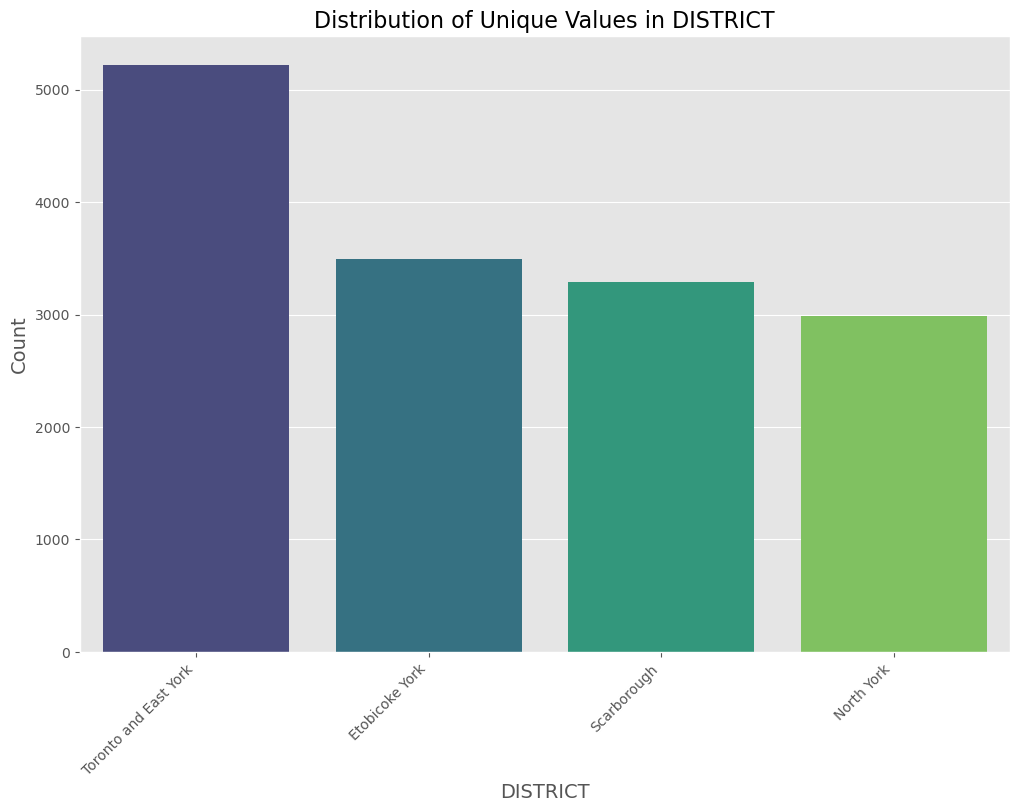

In [22]:
# Get the unique values and their counts in the 'DISTRICT' column
district_counts = df['DISTRICT'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x=district_counts.index, y=district_counts.values, palette='viridis')

# Adding labels and title
plt.title('Distribution of Unique Values in DISTRICT', fontsize=16)
plt.xlabel('DISTRICT', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.show()


#### As we can clearly see, accidents are mostly happening in the district "Toronto and East York"

In [26]:
#Getting the unique values in the column DISTRICT
print('Unique values in DISTRICT are:', dft['DISTRICT'].unique())

Unique values in DISTRICT are: ['Scarborough' 'Etobicoke York' 'Toronto and East York' 'North York' nan]


In [28]:
#Created a map with the
district_mapper = {'WILLIAM R ALLEN RD':'North York','71 MCCOOL CRT':'Scarborough','DON VALLEY PARKWAY  N':'Toronto and East York','OAKDALE RD':'North York',
           'BATHURST ST':'North York','COLLIER ST':'Toronto and East York'}

In [30]:
#Created a map with the
district_mapper_test = {'WILLIAM R ALLEN RD':'North York','71 MCCOOL CRT':'Scarborough','DON VALLEY PARKWAY  N':'Toronto and East York','OAKDALE RD':'North York',
           'BATHURST ST':'North York','COLLIER ST':'Toronto and East York'}

In [31]:
def fill_district(row, mapping):
    if pd.isna(row['DISTRICT']):
        return mapping.get(row['STREET1'], row['DISTRICT'])
    return row['DISTRICT']

# Apply the function to the DataFrame
df['DISTRICT'] = df.apply(lambda row: fill_district(row, district_mapper), axis=1)


In [36]:
def fill_district(row, mapping):
    if pd.isna(row['DISTRICT']):
        return mapping.get(row['STREET1'], row['DISTRICT'])
    return row['DISTRICT']

# Apply the function to the DataFrame
dft['DISTRICT'] = dft.apply(lambda row: fill_district(row, district_mapper_test), axis=1)


In [37]:
print('Number of missing values in DISTRICT column are ',df['DISTRICT'].isna().sum())

Number of missing values in DISTRICT column are  0


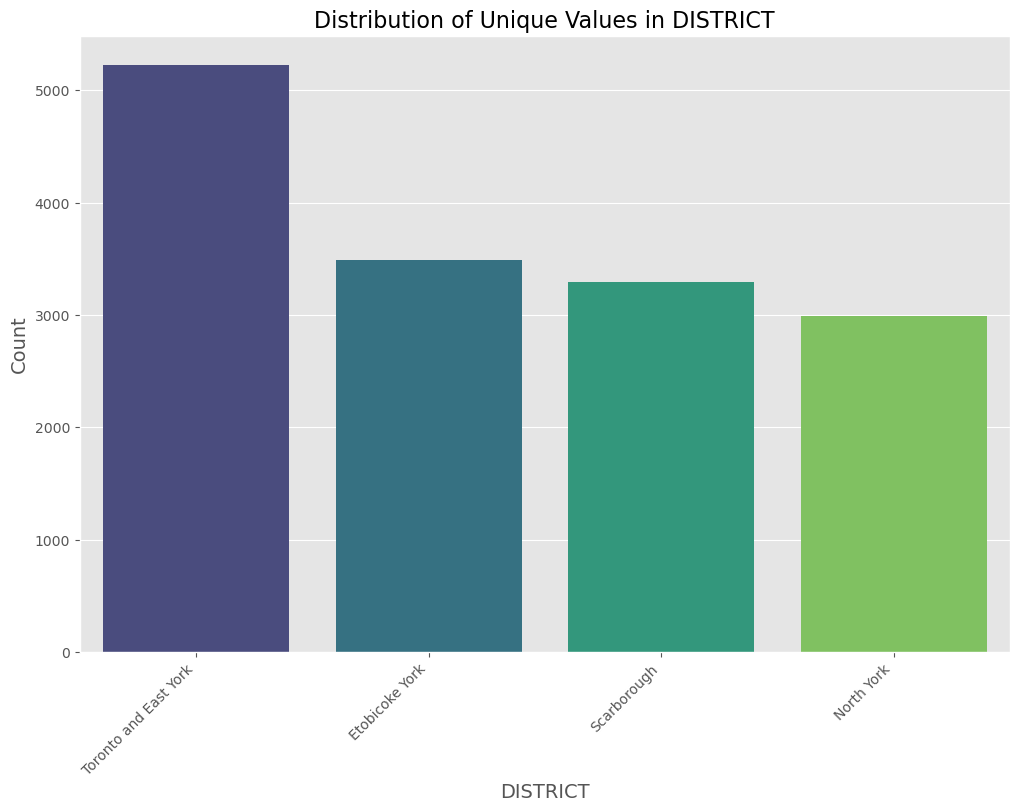

In [38]:
# Get the unique values and their counts in the 'DISTRICT' column
district_counts = df['DISTRICT'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x=district_counts.index, y=district_counts.values, palette='viridis')

# Adding labels and title
plt.title('Distribution of Unique Values in DISTRICT', fontsize=16)
plt.xlabel('DISTRICT', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.show()


#### After filling the null values, the above plot shows the distribution which has no change

In [34]:
print('Number of missing values in DISTRICT column are ',dft['DISTRICT'].isna().sum())

Number of missing values in DISTRICT column are  206


In [33]:
dft['DISTRICT'].fillna(dft['DISTRICT'].mode()[0],axis=0,inplace=True)


In [39]:
# for the test data

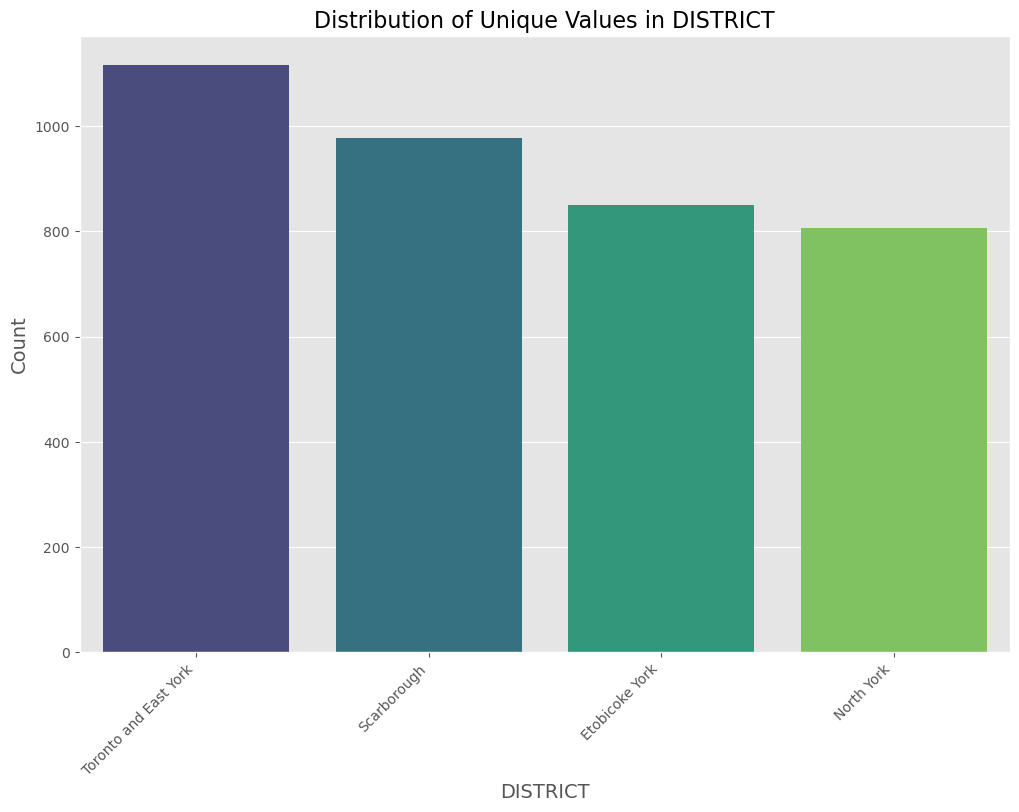

In [40]:
# Get the unique values and their counts in the 'DISTRICT' column
district_counts = dft['DISTRICT'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x=district_counts.index, y=district_counts.values, palette='viridis')

# Adding labels and title
plt.title('Distribution of Unique Values in DISTRICT', fontsize=16)
plt.xlabel('DISTRICT', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.show()


#### The test dataset is also resembling the same distribution like in the train set

### ACCLOC

In [41]:
df['ACCLOC'].unique()

array(['Intersection Related', nan, 'At Intersection', 'Non Intersection',
       'Private Driveway', 'At/Near Private Drive', 'Underpass or Tunnel',
       'Overpass or Bridge', 'Trail', 'Laneway'], dtype=object)

In [42]:
dft['ACCLOC'].unique()

array(['Non Intersection', 'At Intersection', 'Intersection Related',
       'At/Near Private Drive', 'Laneway', 'Overpass or Bridge', 'Other',
       nan], dtype=object)

In [36]:
# Mapping for grouped categories
acc_loc_mapping = {
    'At Intersection': 'Intersection',
    'Intersection Related': 'Intersection',
    'Non Intersection': 'Non Intersection',
    'At/Near Private Drive': 'Private Drive',
    'Private Driveway': 'Private Drive',
    'Overpass or Bridge': 'Passageways',
    'Underpass or Tunnel': 'Passageways',
    'Laneway': 'Passageways',
    'Trail': 'Other'
}

# Applying the mapping to the 'ACCLOC' column
df['ACCLOC'] = df['ACCLOC'].replace(acc_loc_mapping)

df['ACCLOC'].value_counts()

ACCLOC
Intersection        7816
Non Intersection    1480
Private Drive        228
Passageways           25
Other                  1
Name: count, dtype: int64

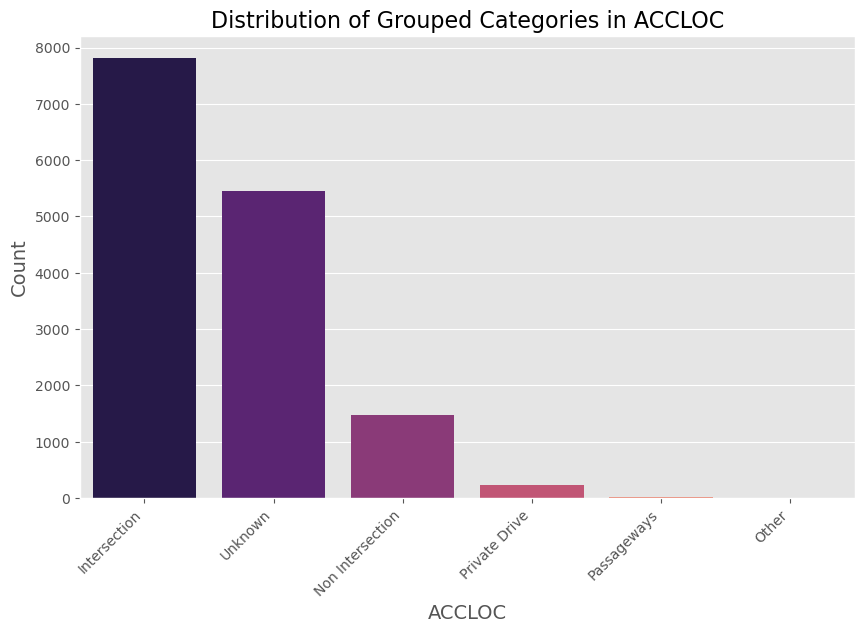

In [160]:
# Applying the mapping to the 'ACCLOC' column
df['ACCLOC'] = df['ACCLOC'].replace(acc_loc_mapping)

# Get the counts of each unique value in the 'ACCLOC' column after mapping
accloc_counts_mapped = df['ACCLOC'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=accloc_counts_mapped.index, y=accloc_counts_mapped.values, palette='magma')

# Adding labels and title
plt.title('Distribution of Grouped Categories in ACCLOC', fontsize=16)
plt.xlabel('ACCLOC', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.show()


#### From the above plot, we can clearly say that most if the accidents are occuring at the intersections and many were unknown

In [37]:
# Mapping for grouped categories
acc_loc_mapping = {
    'At Intersection': 'Intersection',
    'Intersection Related': 'Intersection',
    'Non Intersection': 'Non Intersection',
    'At/Near Private Drive': 'Private Drive',
    'Private Driveway': 'Private Drive',
    'Overpass or Bridge': 'Passageways',
    'Underpass or Tunnel': 'Passageways',
    'Laneway': 'Passageways',
    'Trail': 'Other'
}

# Applying the mapping to the 'ACCLOC' column
dft['ACCLOC'] = dft['ACCLOC'].replace(acc_loc_mapping)

dft['ACCLOC'].value_counts()

ACCLOC
Intersection        2561
Non Intersection    1180
Private Drive        192
Passageways            9
Other                  8
Name: count, dtype: int64

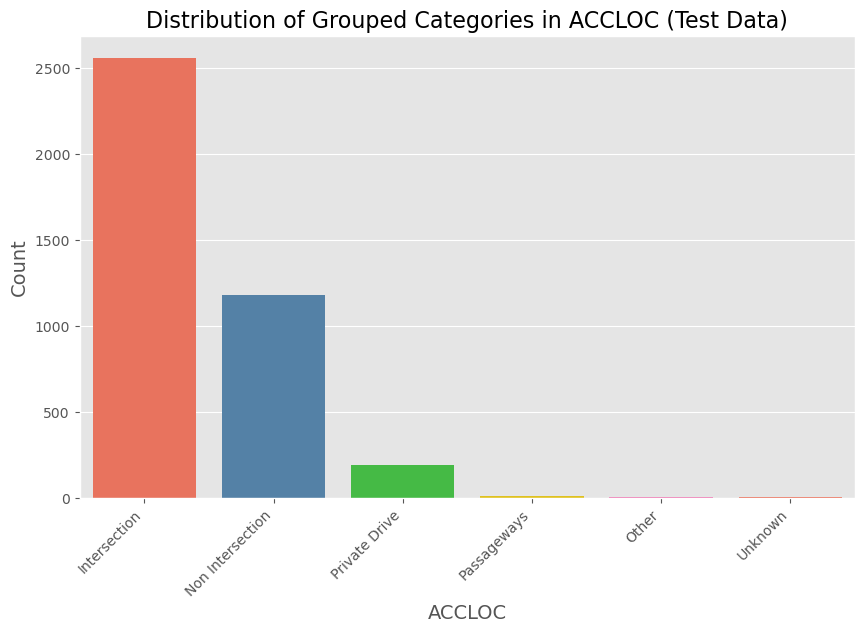

In [161]:
# Applying the mapping to the 'ACCLOC' column
dft['ACCLOC'] = dft['ACCLOC'].replace(acc_loc_mapping)

# Get the counts of each unique value in the 'ACCLOC' column after mapping
accloc_counts_mapped = dft['ACCLOC'].value_counts()

# Define a custom color palette for the bar plot
custom_colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#FF69B4']

# Plotting the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=accloc_counts_mapped.index, y=accloc_counts_mapped.values, palette=custom_colors)

# Adding labels and title
plt.title('Distribution of Grouped Categories in ACCLOC (Test Data)', fontsize=16)
plt.xlabel('ACCLOC', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.show()


#### The distribtion in the test data set also shows the same patterns like the train set

In [23]:
#converting time to hours and minutes
def time_to_hhmm(time_int):
    time_str = str(time_int).zfill(4)  # Ensure the string is 4 characters long
    time_obj = pd.to_datetime(time_str, format='%H%M')
    return time_obj.hour * 100 + time_obj.minute

# Convert TIME column to HHMM integer format
df['TIME'] = df['TIME'].apply(time_to_hhmm)

# Function to map time values to segments of the day
def map_time_to_segment(time):
    if time < 600:
        return 'Midnight'
    elif time < 1200:
        return 'Morning'
    elif time < 1700:
        return 'Afternoon'
    elif time < 2100:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to the TIME column and create a new column 'TIME_SEGMENT'
df['TIME_SEGMENT'] = df['TIME'].apply(map_time_to_segment)

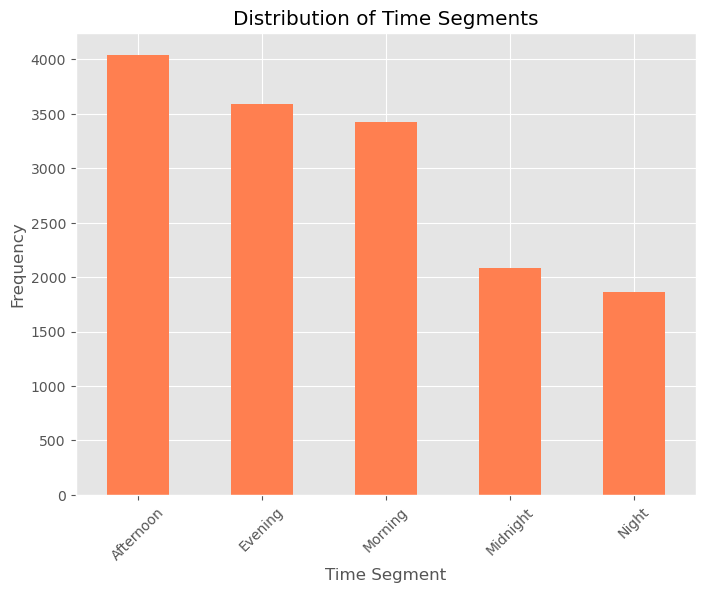

In [24]:
#plotting the histogram
plt.figure(figsize=(8, 6))
time_segment_counts = df['TIME_SEGMENT'].value_counts()
time_segment_counts.plot(kind='bar', color='coral')
plt.title('Distribution of Time Segments')
plt.xlabel('Time Segment')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### The above plot shows the time of the accident happend, as we can see during the afternoon times there are more accidents compared to might and midnight

In [25]:
def time_to_hhmm(time_int):
    time_str = str(time_int).zfill(4)  # Ensure the string is 4 characters long
    time_obj = pd.to_datetime(time_str, format='%H%M')
    return time_obj.hour * 100 + time_obj.minute

# Convert TIME column to HHMM integer format
dft['TIME'] = dft['TIME'].apply(time_to_hhmm)

# Function to map time values to segments of the day
def map_time_to_segment(time):
    if time < 600:
        return 'Midnight'
    elif time < 1200:
        return 'Morning'
    elif time < 1700:
        return 'Afternoon'
    elif time < 2100:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to the TIME column and create a new column 'TIME_SEGMENT'
dft['TIME_SEGMENT'] = dft['TIME'].apply(map_time_to_segment)

In [26]:
# Defining a function to map dates to seasons
def get_season(date):
    month = date.month
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

# Converting the 'DATE' column to datetime format if it's not already
df['DATE'] = pd.to_datetime(df['DATE'])

# Applying the function to create a new column for seasons
df['SEASON'] = df['DATE'].apply(get_season)


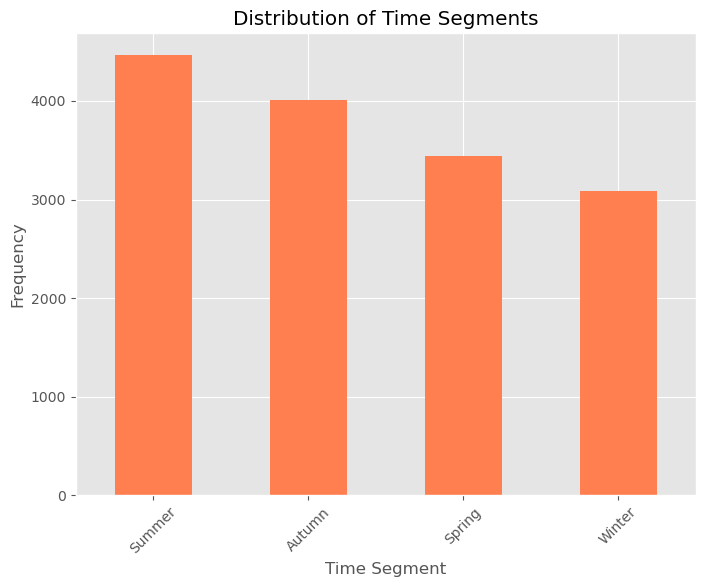

In [50]:
#plotting the histogram
plt.figure(figsize=(8, 6))
time_segment_counts = df['SEASON'].value_counts()
time_segment_counts.plot(kind='bar', color='coral')
plt.title('Distribution of Time Segments')
plt.xlabel('Time Segment')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### The above plot shows the accident information according to the season, in which the summer and autumn seasons are having more accidents

In [27]:
# Defining a function to map dates to seasons
def get_season(date):
    month = date.month
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

# Converting the 'DATE' column to datetime format if it's not already
dft['DATE'] = pd.to_datetime(dft['DATE'])

# Applying the function to create a new column for seasons
dft['SEASON'] = dft['DATE'].apply(get_season)


In [28]:
df.shape

(15000, 56)

In [29]:
dft.shape

(3956, 55)

### IMPACTYPE

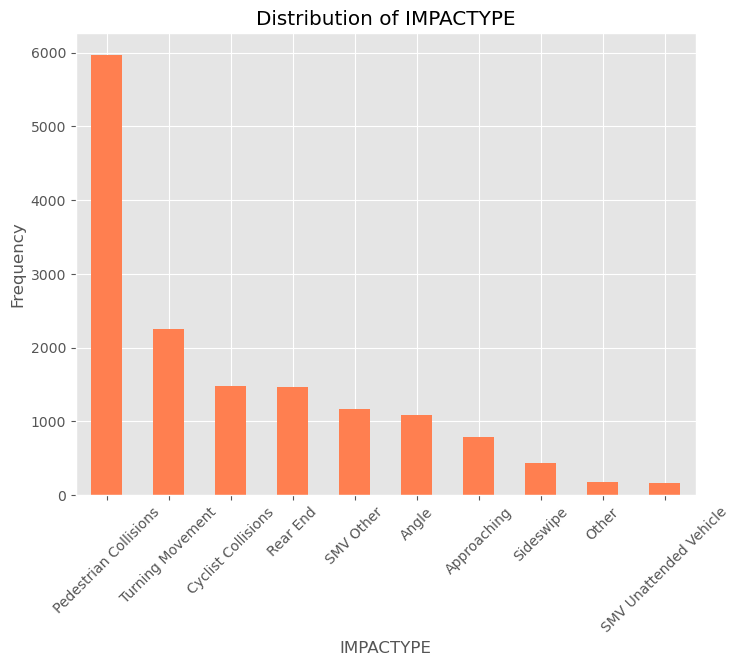

In [30]:
#plotting the histogram to visualize the distributions
plt.figure(figsize=(8, 6))
time_segment_counts = df['IMPACTYPE'].value_counts()
time_segment_counts.plot(kind='bar', color='coral')
plt.title('Distribution of IMPACTYPE')
plt.xlabel('IMPACTYPE')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### As we can see that the train set has most values of pedestrian collisions for the column 'IMPACTYPE'

In [44]:
#checking for nulls in the train set
df['IMPACTYPE'].isnull().sum()

0

In [45]:
#checking for null values in the test set
dft['IMPACTYPE'].isnull().sum()

27

In [46]:
df['IMPACTYPE'].unique()

array(['Approaching', 'SMV Other', 'Pedestrian Collisions', 'Angle',
       'Turning Movement', 'Cyclist Collisions', 'Rear End', 'Sideswipe',
       'SMV Unattended Vehicle', 'Other'], dtype=object)

In [47]:
dft['IMPACTYPE'].unique()
dft['IMPACTYPE'].fillna('Other', inplace=True)

### ROAD_CLASS

In [49]:
df['ROAD_CLASS'].unique()
df['ROAD_CLASS'].fillna('Major Arterial', inplace=True)# filling with mode
df['ROAD_CLASS'].isnull().sum()

0

In [50]:
dft['ROAD_CLASS'].unique()
dft['ROAD_CLASS'].fillna('Major Arterial', inplace=True)# filling with mode
dft['ROAD_CLASS'].isnull().sum()

0

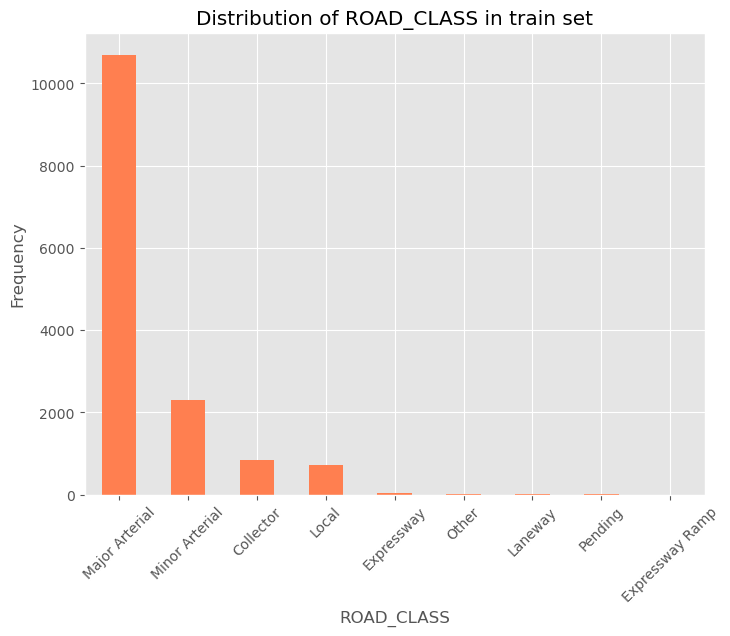

In [32]:
#plotting the histogram to visualize the distributions
plt.figure(figsize=(8, 6))
time_segment_counts = df['ROAD_CLASS'].value_counts()
time_segment_counts.plot(kind='bar', color='coral')
plt.title('Distribution of ROAD_CLASS in train set')
plt.xlabel('ROAD_CLASS')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

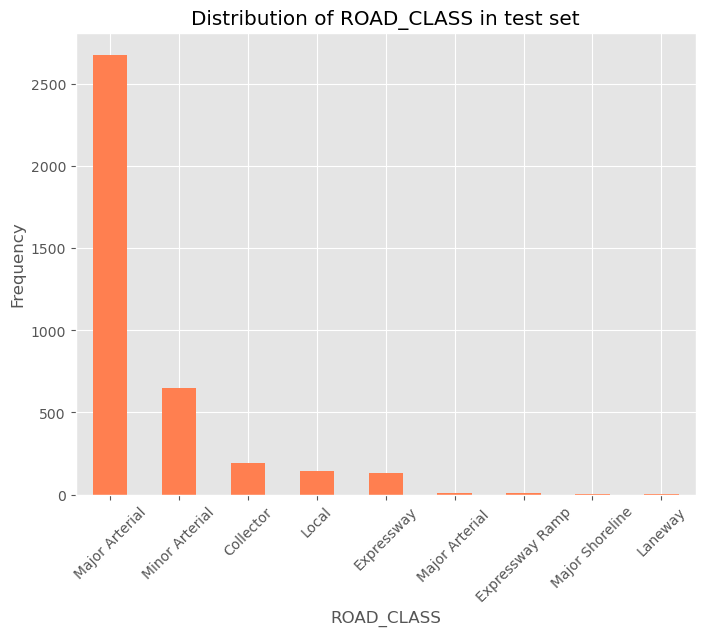

In [33]:
#plotting the histogram to visualize the distributions (test set)
plt.figure(figsize=(8, 6))
time_segment_counts = dft['ROAD_CLASS'].value_counts()
time_segment_counts.plot(kind='bar', color='coral')
plt.title('Distribution of ROAD_CLASS in test set')
plt.xlabel('ROAD_CLASS')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### The results of above two plots are almost similar as most of the road claases are Major Arterial

### TRAFFCTL

In [36]:
#no of null values
df['TRAFFCTL'].isna().sum()

29

In [37]:
#filling nulls using mode
dft['TRAFFCTL'].fillna('No Control', inplace=True)

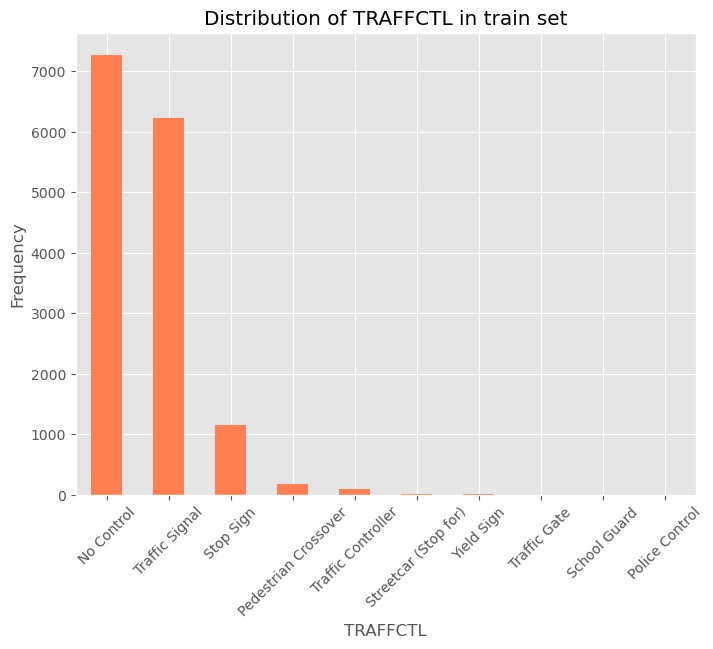

In [38]:
#plotting the histogram to visualize the distributions
plt.figure(figsize=(8, 6))
time_segment_counts = df['TRAFFCTL'].value_counts()
time_segment_counts.plot(kind='bar', color='coral')
plt.title('Distribution of TRAFFCTL in train set')
plt.xlabel('TRAFFCTL')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

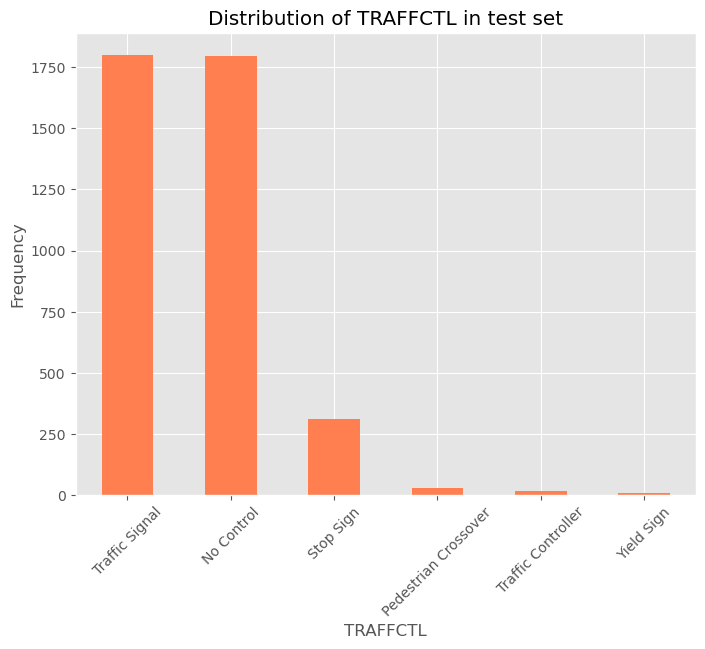

In [39]:
#plotting the histogram 
plt.figure(figsize=(8, 6))
time_segment_counts = dft['TRAFFCTL'].value_counts()
time_segment_counts.plot(kind='bar', color='coral')
plt.title('Distribution of TRAFFCTL in test set')
plt.xlabel('TRAFFCTL')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### From the above two plots we can say that Traffic signal and No contrl are almost equal but the maximum values standing positions are swapped in train and test sets

### VISIBILITY

In [40]:
#checking for nulls
df['VISIBILITY'].isnull().sum()

14

In [41]:
#filling the nulls
df['VISIBILITY'].fillna('Clear', inplace=True)

In [42]:
#checking for nulls in test set
dft['VISIBILITY'].isnull().sum()

10

In [43]:
#filling the nans
dft['VISIBILITY'].fillna('Clear', inplace=True)

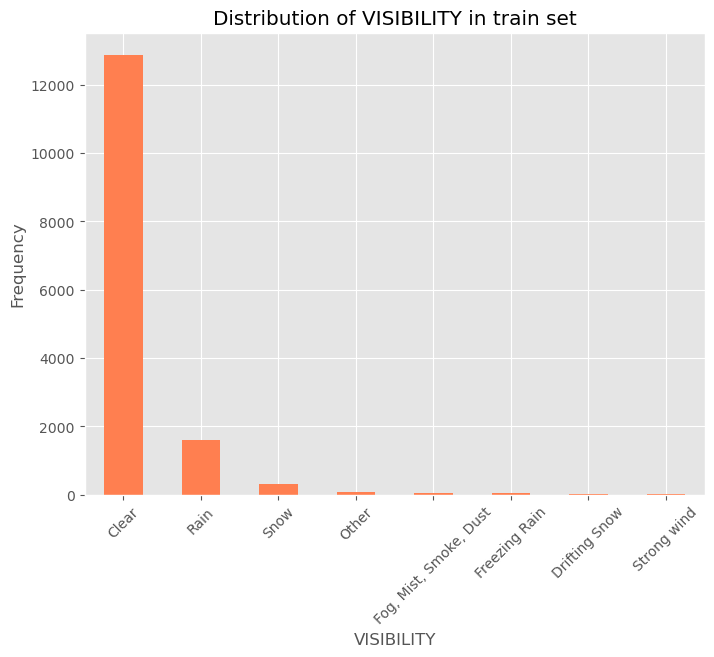

In [45]:
#plotting the histogram 
plt.figure(figsize=(8, 6))
time_segment_counts = df['VISIBILITY'].value_counts()
time_segment_counts.plot(kind='bar', color='coral')
plt.title('Distribution of VISIBILITY in train set')
plt.xlabel('VISIBILITY')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

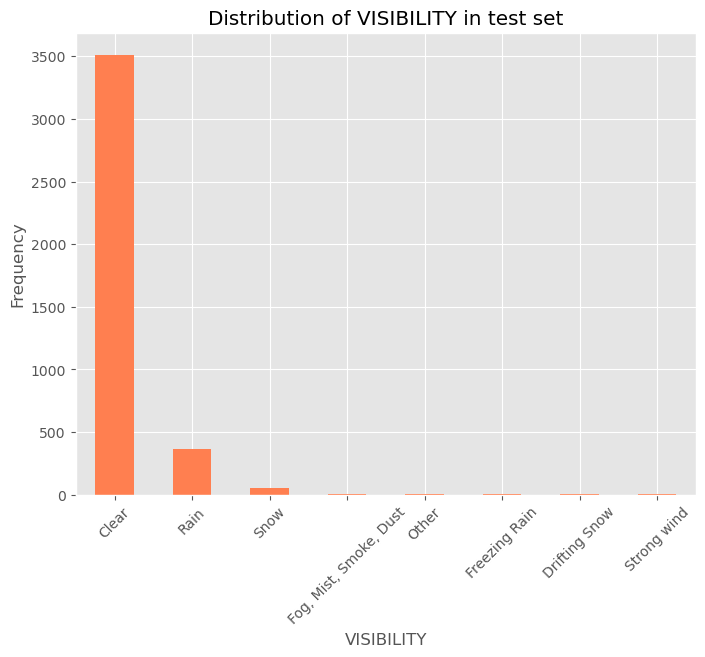

In [46]:
#plotting the histogram 
plt.figure(figsize=(8, 6))
time_segment_counts = dft['VISIBILITY'].value_counts()
time_segment_counts.plot(kind='bar', color='coral')
plt.title('Distribution of VISIBILITY in test set')
plt.xlabel('VISIBILITY')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### Both distributions are similar in case of VISIBILITY column in the dataset

### ACCLOC

In [47]:
#checcking for nulls
df['ACCLOC'].isnull().sum()

5450

In [48]:
df['ACCLOC'] = df['ACCLOC'].fillna('Unknown') #filling with 'unknown' value

In [49]:
dft['ACCLOC'].isnull().sum()

6

In [50]:
dft['ACCLOC'] = dft['ACCLOC'].fillna('Unknown')

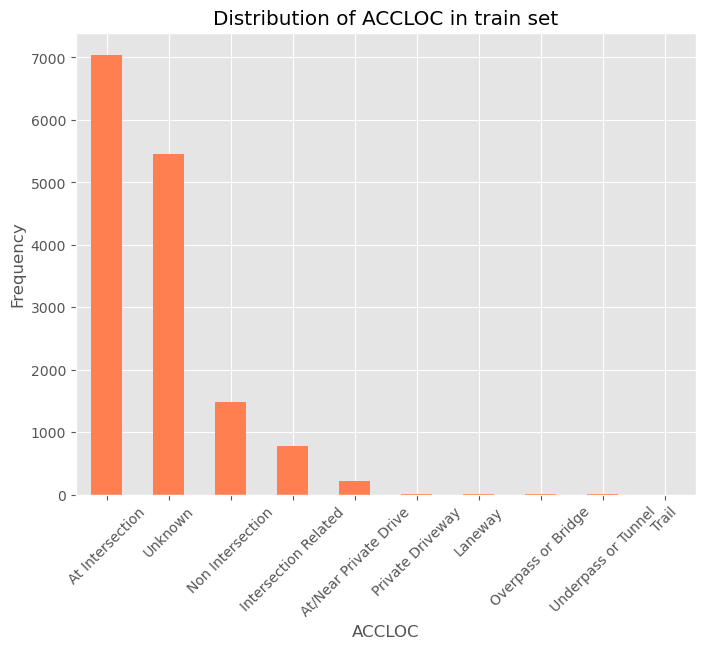

In [51]:
#plotting the histogram 
plt.figure(figsize=(8, 6))
time_segment_counts = df['ACCLOC'].value_counts()
time_segment_counts.plot(kind='bar', color='coral')
plt.title('Distribution of ACCLOC in train set')
plt.xlabel('ACCLOC')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

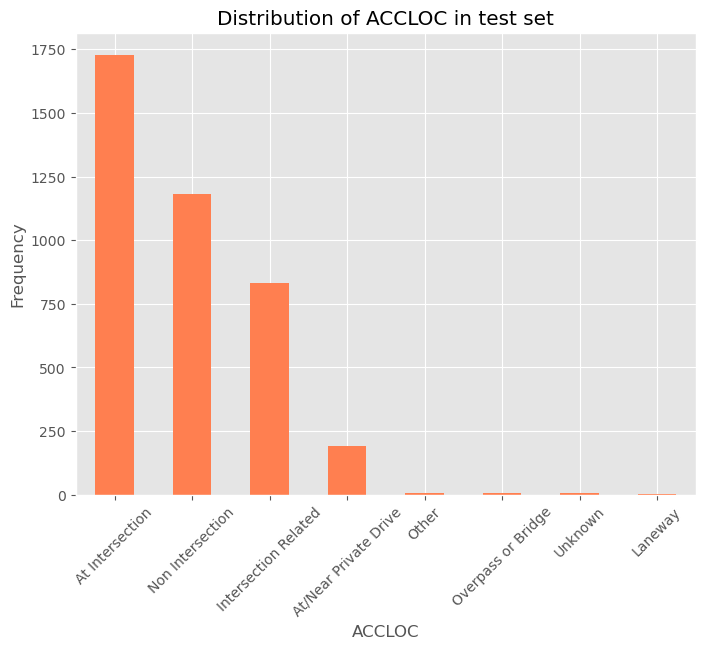

In [52]:
#plotting the histogram 
plt.figure(figsize=(8, 6))
time_segment_counts = dft['ACCLOC'].value_counts()
time_segment_counts.plot(kind='bar', color='coral')
plt.title('Distribution of ACCLOC in test set')
plt.xlabel('ACCLOC')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### We are filling the following columns missing values with the value 'Unknown'

In [53]:
df['PEDTYPE'] = df['PEDTYPE'].fillna('Unknown')
df['PEDACT'] = df['PEDACT'].fillna('Unknown')
df['PEDCOND'] = df['PEDCOND'].fillna('Unknown')

In [54]:
dft['PEDTYPE'] = dft['PEDTYPE'].fillna('Unknown')
dft['PEDACT'] = dft['PEDACT'].fillna('Unknown')
dft['PEDCOND'] = dft['PEDCOND'].fillna('Unknown')

In [55]:
df['CYCLISTYPE'] = df['CYCLISTYPE'].fillna('Unknown')
df['CYCACT'] = df['CYCACT'].fillna('Unknown')
df['CYCCOND'] = df['CYCCOND'].fillna('Unknown')

In [56]:
dft['CYCLISTYPE'] = dft['CYCLISTYPE'].fillna('Unknown')
dft['CYCACT'] = dft['CYCACT'].fillna('Unknown')
dft['CYCCOND'] = dft['CYCCOND'].fillna('Unknown')

In [57]:
#FIlling INVTYPE with value 'None'
df['INVTYPE'].unique()
df['INVTYPE'].fillna('None', inplace=True)

In [58]:
dft['INVTYPE'].unique()
dft['INVTYPE'].fillna('None', inplace=True)

In [63]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'INDEX_', 'ACCNUM', 'DATE', 'TIME', 'STREET1',
       'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'LATITUDE', 'LONGITUDE',
       'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS',
       'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO', 'INITDIR',
       'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT',
       'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140',
       'DIVISION', 'TIME_SEGMENT', 'SEASON'],
      dtype='object')

In [64]:
dft.columns

Index(['X', 'Y', 'OBJECTID', 'INDEX_', 'ACCNUM', 'DATE', 'TIME', 'STREET1',
       'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'LATITUDE', 'LONGITUDE',
       'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE',
       'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE',
       'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND',
       'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140',
       'DIVISION', 'TIME_SEGMENT', 'SEASON'],
      dtype='object')

In [59]:
#INITDIR going to fill NANs with 'Unknown'
df['INITDIR'].fillna('Unknown', inplace=True)

In [60]:
dft['INITDIR'].fillna('Unknown', inplace=True)

In [61]:
#NANs in VEHTYPE
df['VEHTYPE'].isna().sum()

2056

In [62]:
#Filling with the value 'Automobile'
df['VEHTYPE'].fillna('Automobile', inplace=True)

In [63]:
dft['VEHTYPE'].fillna('Automobile', inplace=True)

In [65]:
# now only 3 columns are missing values
# Saving the results of null values in variable and then into dataframe as Missing Values
null_counts = dft.isnull().sum()
null_df = pd.DataFrame(null_counts, columns=["Missing Values"])

# Saving the results of inique values in variable and then into dataframe as Uinique Values
unique_values = dft.nunique().reset_index()
unique_values.columns = ["Feature", "Unique Values"]

# Merging both the DataFrames in one dataframe
combined_df = pd.merge(unique_values, null_df, left_on="Feature", right_index=True)

combined_df

,Feature,Unique Values,Missing Values
0,X,1518,0
1,Y,1518,0
2,OBJECTID,3956,0
3,INDEX_,3956,0
4,ACCNUM,1132,1232
5,DATE,1047,0
6,TIME,853,0
7,STREET1,633,0
8,STREET2,918,363
9,OFFSET,323,2064


#### 'DRIVACT', 'DRIVCOND', 'PEDTYPE'

In [66]:
df['DRIVACT'].unique() # filling with the other for unknown data.
df['DRIVACT'].fillna('Other', inplace=True)

In [67]:
dft['DRIVACT'].unique() # filling with the other for unknown data.
dft['DRIVACT'].fillna('Other', inplace=True)

In [68]:

df['DRIVCOND'].unique() # filling with the other for unknown data.
df['DRIVCOND'].fillna('Unknown', inplace=True)

In [69]:

dft['DRIVCOND'].unique() # filling with the other for unknown data.
dft['DRIVCOND'].fillna('Unknown', inplace=True)

In [70]:

df['PEDTYPE'].unique() # filling with the other for unknown data.
#df['PEDTYPE'].fillna('Unknown', inplace=True)
df['PEDTYPE'].isnull().sum()

0

In [71]:

dft['PEDTYPE'].unique() # filling with the other for unknown data.
#df['PEDTYPE'].fillna('Unknown', inplace=True)
dft['PEDTYPE'].isnull().sum()

0

In [72]:


df['PEDACT'].unique() # filling with the other for unknown data.
#df['PEDTYPE'].fillna('Unknown', inplace=True)
df['PEDACT'].isnull().sum()

0

In [73]:
dft['PEDACT'].unique() # filling with the other for unknown data.
#df['PEDTYPE'].fillna('Unknown', inplace=True)
dft['PEDACT'].isnull().sum()

0

In [74]:
#NANs in OFFSET
df['OFFSET'].isna().sum()

13072

In [75]:
dft['OFFSET'].isna().sum()

2064

In [85]:
#dropping the OFFSET as most of the values are missing
df.drop(columns=['OFFSET'], axis=1, inplace=True)

In [86]:
dft.drop(columns=['OFFSET'], axis=1, inplace=True)

In [76]:
#dropping the other columns which do not contribute to our model

In [77]:
df.drop(columns=['STREET1','STREET2','ACCNUM','FATAL_NO','OBJECTID','DATE','INDEX_','TIME','LATITUDE', 'LONGITUDE'], axis=1, inplace=True)

In [78]:
dft.drop(columns=['STREET1','STREET2','ACCNUM','FATAL_NO','OBJECTID','DATE','INDEX_','TIME','LATITUDE', 'LONGITUDE'], axis=1, inplace=True)

In [79]:
df.columns

Index(['X', 'Y', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'ACCLOC', 'TRAFFCTL',
       'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE',
       'INVAGE', 'INJURY', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT',
       'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT',
       'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'HOOD_158', 'NEIGHBOURHOOD_158',
       'HOOD_140', 'NEIGHBOURHOOD_140', 'DIVISION', 'TIME_SEGMENT', 'SEASON'],
      dtype='object')

In [80]:
dft.columns

Index(['X', 'Y', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'ACCLOC', 'TRAFFCTL',
       'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE', 'INVAGE',
       'INJURY', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND',
       'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND',
       'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'HOOD_158', 'NEIGHBOURHOOD_158',
       'HOOD_140', 'NEIGHBOURHOOD_140', 'DIVISION', 'TIME_SEGMENT', 'SEASON'],
      dtype='object')

In [81]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['integer']).columns.tolist()

In [82]:
numerical_columns

[]

In [83]:
df

,X,Y,OFFSET,ROAD_CLASS,DISTRICT,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,...,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,TIME_SEGMENT,SEASON
0,635468.3685,4839880.764,NaN,Major Arterial,Toronto and East York,Intersection Related,No Control,Clear,Dark,Wet,...,No,Yes,No,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,Midnight,Winter
1,635468.3685,4839880.764,NaN,Major Arterial,Toronto and East York,Intersection Related,No Control,Clear,Dark,Wet,...,No,Yes,No,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,Midnight,Winter
2,635468.3685,4839880.764,NaN,Major Arterial,Toronto and East York,Intersection Related,No Control,Clear,Dark,Wet,...,No,Yes,No,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,Midnight,Winter
3,635468.3685,4839880.764,NaN,Major Arterial,Toronto and East York,Intersection Related,No Control,Clear,Dark,Wet,...,No,Yes,No,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,Midnight,Winter
4,635468.3685,4839880.764,NaN,Major Arterial,Toronto and East York,Intersection Related,No Control,Clear,Dark,Wet,...,No,Yes,No,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,Midnight,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,641202.6999,4842218.457,NaN,Minor Arterial,Scarborough,At Intersection,Traffic Signal,Clear,Daylight,Dry,...,Yes,No,No,123,Cliffcrest,123,Cliffcrest (123),D41,Morning,Autumn
14996,627158.8849,4836916.840,NaN,Minor Arterial,Toronto and East York,At Intersection,No Control,Clear,Daylight,Dry,...,No,No,No,94,Wychwood,94,Wychwood (94),D13,Morning,Autumn
14997,627158.8849,4836916.840,NaN,Minor Arterial,Toronto and East York,At Intersection,No Control,Clear,Daylight,Dry,...,No,No,No,94,Wychwood,94,Wychwood (94),D13,Morning,Autumn
14998,638360.8419,4852316.818,NaN,Major Arterial,Scarborough,At Intersection,Traffic Signal,Clear,Daylight,Dry,...,No,No,No,129,Agincourt North,129,Agincourt North (129),D42,Evening,Autumn


In [84]:
# Saving the results of null values in variable and then into dataframe as Missing Values
null_counts = df.isnull().sum()
null_df = pd.DataFrame(null_counts, columns=["Missing Values"])

# Saving the results of inique values in variable and then into dataframe as Uinique Values
unique_values = df.nunique().reset_index()
unique_values.columns = ["Feature", "Unique Values"]

# Merging both the DataFrames in one dataframe
combined_df = pd.merge(unique_values, null_df, left_on="Feature", right_index=True)

combined_df# INJURY	 MANOEUVER   RDSFCOND

,Feature,Unique Values,Missing Values
0,X,4695,0
1,Y,4695,0
2,OFFSET,335,13072
3,ROAD_CLASS,9,357
4,DISTRICT,4,16
5,ACCLOC,10,0
6,TRAFFCTL,10,29
7,VISIBILITY,8,0
8,LIGHT,9,0
9,RDSFCOND,9,19


In [85]:
# Saving the results of null values in variable and then into dataframe as Missing Values
null_counts = dft.isnull().sum()
null_df = pd.DataFrame(null_counts, columns=["Missing Values"])

# Saving the results of inique values in variable and then into dataframe as Uinique Values
unique_values = dft.nunique().reset_index()
unique_values.columns = ["Feature", "Unique Values"]

# Merging both the DataFrames in one dataframe
combined_df = pd.merge(unique_values, null_df, left_on="Feature", right_index=True)

combined_df# INJURY	 MANOEUVER   RDSFCOND

,Feature,Unique Values,Missing Values
0,X,1518,0
1,Y,1518,0
2,OFFSET,323,2064
3,ROAD_CLASS,9,129
4,DISTRICT,4,213
5,ACCLOC,8,0
6,TRAFFCTL,6,0
7,VISIBILITY,8,0
8,LIGHT,9,4
9,RDSFCOND,8,10


In [86]:
#NANs in INJURY
df['INJURY'].isna().sum()

7189

In [87]:
#test set
dft['INJURY'].isna().sum()

1708

In [88]:
#Filling with Unknown
df['INJURY'].fillna('Unknown', inplace=True)

In [89]:
dft['INJURY'].fillna('Unknown', inplace=True)

In [ ]:
#checking for nulls in MANOEUVER column

In [90]:
df['MANOEUVER'].isna().sum()

6514

In [91]:
dft['MANOEUVER'].isna().sum()

1439

In [92]:
#Filling with Unkwown

In [93]:
df['MANOEUVER'].fillna('Unknown', inplace=True)

In [94]:
dft['MANOEUVER'].fillna('Unknown', inplace=True)

In [ ]:
#checking for nulls in RDSFCOND column

In [95]:
df['RDSFCOND'].isna().sum()

19

In [96]:
dft['RDSFCOND'].isna().sum()

10

In [97]:
#Filling with 'Other'

In [98]:
df['RDSFCOND'].fillna('Other', inplace=True)

In [99]:
dft['RDSFCOND'].fillna('Other', inplace=True)

### Cramers V is a measure of association between two nominal variables, giving a value between 0 and +1 (inclusive). It is based on Pearson's chi-squared statistic.

In [103]:
#defining a function for finding cramerV
def cramerV(data_crosstab):
    total = data_crosstab.sum().sum()
    chi2 = stats.chi2_contingency(data_crosstab)[0]
    phi2 = chi2/total
    r, k = data_crosstab.shape

    phi2corr = max(0,phi2-((k-1)*(r-1))/(total-1))
    rcorr = r-((r-1)**2)/(total-1)
    kcorr = k-((k-1)**2)/(total-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [104]:
#finding the values 
cramerValue = {}

for col in df.columns:
    data_crosstab = pd.crosstab(df[col], df['ACCLASS'])
    data = cramerV(data_crosstab)
    cramerValue[col] = data*100

In [105]:
#converting to data frame
cv = pd.DataFrame()
cv['values'] = cramerValue.values()
cv['key'] = cramerValue.keys()
cv

,values,key
0,77.533903,X
1,77.533903,Y
2,66.776681,OFFSET
3,4.222642,ROAD_CLASS
4,7.849754,DISTRICT
5,5.202426,ACCLOC
6,5.675292,TRAFFCTL
7,4.754250,VISIBILITY
8,5.477383,LIGHT
9,7.803871,RDSFCOND


In [106]:
values_greater_than_10=cv[cv['values']>10]

In [107]:
column_with_cv_greater_than_10=values_greater_than_10.key

In [108]:
column_with_cv_greater_than_10.values

array(['X', 'Y', 'OFFSET', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INJURY',
       'VEHTYPE', 'TRUCK', 'SPEEDING', 'HOOD_158', 'NEIGHBOURHOOD_158',
       'HOOD_140', 'NEIGHBOURHOOD_140'], dtype=object)

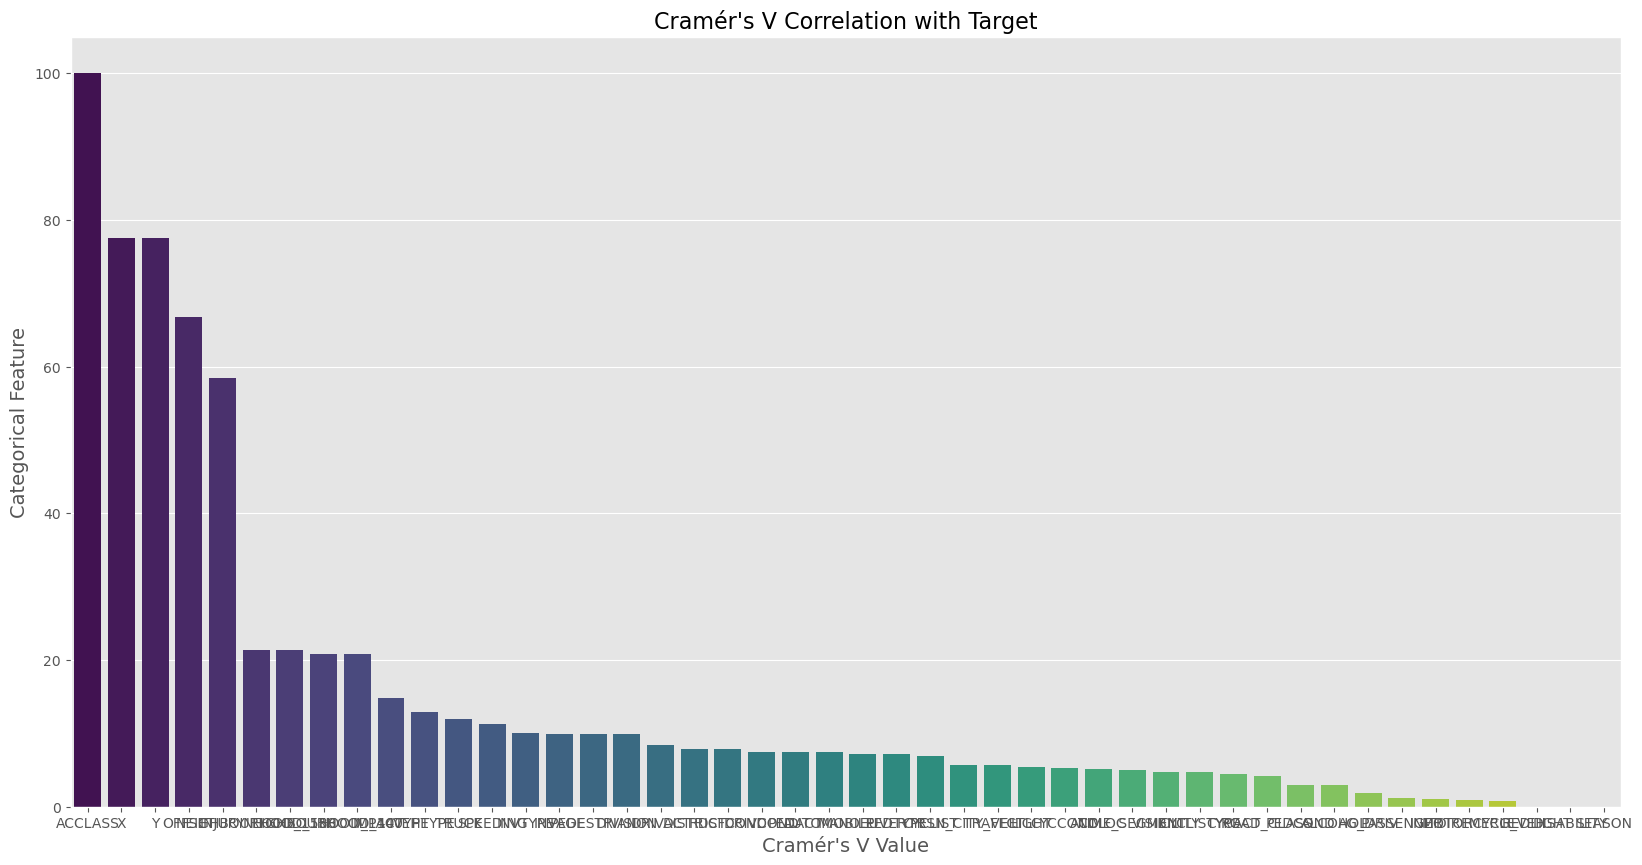

In [109]:
cv_sorted = cv.sort_values(by='values', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(20,10))
sns.barplot(x='key', y='values', data=cv_sorted, palette='viridis')

# Adding labels and title
plt.title('Cramér\'s V Correlation with Target', fontsize=16)
plt.xlabel('Cramér\'s V Value', fontsize=14)
plt.ylabel('Categorical Feature', fontsize=14)
plt.show()

In [110]:
#adding our selected features to  a list
features_selected=['DISTRICT', 'ACCLOC', 'TRAFFCTL', 'RDSFCOND',
       'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'INITDIR', 'VEHTYPE',
       'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'CYCCOND', 'CYCLIST',
       'AUTOMOBILE', 'TRUCK', 'SPEEDING', 'HOOD_158', 'NEIGHBOURHOOD_158',
       'HOOD_140', 'NEIGHBOURHOOD_140', 'DIVISION']


In [111]:
#subsetting the train_data
train_data=df[features_selected]

In [112]:
#test_data
test_data=dft[features_selected]

In [113]:
#dropping some columns from our selections
train_data.drop(columns=['HOOD_158','NEIGHBOURHOOD_158','HOOD_140','NEIGHBOURHOOD_140'], axis=1, inplace=True)

/var/folders/6t/wzrslr3s4js4hr_8wrwhk1p40000gn/T/ipykernel_78823/256031299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(columns=['HOOD_158','NEIGHBOURHOOD_158','HOOD_140','NEIGHBOURHOOD_140'], axis=1, inplace=True)


In [114]:
test_data.drop(columns=['HOOD_158','NEIGHBOURHOOD_158','HOOD_140','NEIGHBOURHOOD_140'], axis=1, inplace=True)
#Adding to dropping list

/var/folders/6t/wzrslr3s4js4hr_8wrwhk1p40000gn/T/ipykernel_78823/987835813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(columns=['HOOD_158','NEIGHBOURHOOD_158','HOOD_140','NEIGHBOURHOOD_140'], axis=1, inplace=True)


In [115]:
#checking for nulls in the final test
test_data.isnull().sum()

DISTRICT      213
ACCLOC          0
TRAFFCTL        0
RDSFCOND        0
IMPACTYPE      27
INVTYPE         0
INVAGE          0
INJURY          0
INITDIR         0
VEHTYPE         0
MANOEUVER       0
DRIVACT         0
DRIVCOND        0
CYCCOND         0
CYCLIST         0
AUTOMOBILE      0
TRUCK           0
SPEEDING        0
DIVISION        0
dtype: int64

In [116]:
categorical_columns = features_selected

# Filter the list of categorical columns to only include those that exist in the DataFrame
existing_categorical_columns = [col for col in categorical_columns if col in train_data.columns]
#print(train_datan_data.columns)
# Apply pd.get_dummies() to convert categorical columns into dummy variables and drop the first category
train_data = pd.get_dummies(train_data, columns=existing_categorical_columns, drop_first=True)
train_data

,DISTRICT_North York,DISTRICT_Scarborough,DISTRICT_Toronto and East York,ACCLOC_At/Near Private Drive,ACCLOC_Intersection Related,ACCLOC_Laneway,ACCLOC_Non Intersection,ACCLOC_Overpass or Bridge,ACCLOC_Private Driveway,ACCLOC_Trail,...,DIVISION_D32,DIVISION_D33,DIVISION_D41,DIVISION_D42,DIVISION_D43,DIVISION_D51,DIVISION_D52,DIVISION_D53,DIVISION_D55,DIVISION_NSA
0,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
14996,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14997,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14998,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [117]:
categorical_columns = features_selected

# Filter the list of categorical columns to only include those that exist in the DataFrame
existing_categorical_columns = [col for col in categorical_columns if col in test_data.columns]
#print(train_data.columns)
# Apply pd.get_dummies() to convert categorical columns into dummy variables and drop the first category
test_data = pd.get_dummies(test_data, columns=existing_categorical_columns, drop_first=True)
test_data

,DISTRICT_North York,DISTRICT_Scarborough,DISTRICT_Toronto and East York,ACCLOC_At/Near Private Drive,ACCLOC_Intersection Related,ACCLOC_Laneway,ACCLOC_Non Intersection,ACCLOC_Other,ACCLOC_Overpass or Bridge,ACCLOC_Unknown,...,DIVISION_D32,DIVISION_D33,DIVISION_D41,DIVISION_D42,DIVISION_D43,DIVISION_D51,DIVISION_D52,DIVISION_D53,DIVISION_D55,DIVISION_NSA
0,False,True,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,True,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3952,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3953,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3954,False,True,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [118]:
# Identify columns present in training data but missing in test data
missing_columns_in_test = set(train_data.columns) - set(test_data.columns)

# Identify columns present in test data but missing in training data
extra_columns_in_test = set(test_data.columns) - set(train_data.columns)

print("Missing columns in test data:", missing_columns_in_test)
print("Extra columns in test data:", extra_columns_in_test)

Missing columns in test data: {'TRAFFCTL_Traffic Gate', 'TRAFFCTL_School Guard', 'INVTYPE_Pedestrian - Not Hit', 'INVTYPE_Trailer Owner', 'VEHTYPE_Other Emergency Vehicle', 'MANOEUVER_Disabled', 'RDSFCOND_Spilled liquid', 'INVTYPE_In-Line Skater', 'INVTYPE_Witness', 'INVTYPE_Other Property Owner', 'VEHTYPE_Off Road - 2 Wheels', 'TRAFFCTL_Police Control', 'CYCCOND_Fatigue', 'CYCCOND_Ability Impaired, Alcohol Over .80', 'CYCCOND_Medical or Physical Disability', 'DRIVACT_Wrong Way on One Way Road', 'CYCCOND_Ability Impaired, Drugs', 'ACCLOC_Trail', 'TRAFFCTL_Streetcar (Stop for)', 'ACCLOC_Underpass or Tunnel', 'ACCLOC_Private Driveway'}
Extra columns in test data: {'VEHTYPE_Rickshaw', 'VEHTYPE_Off Road - 4 Wheels', 'VEHTYPE_Unknown', 'ACCLOC_Other', 'INVTYPE_Moped Passenger', 'VEHTYPE_Automobile', 'VEHTYPE_Off Road - Other'}


In [119]:
col=['TRAFFCTL_School Guard', 'CYCCOND_Medical or Physical Disability', 'TRAFFCTL_Traffic Gate', 'INVTYPE_Witness', 'CYCCOND_Ability Impaired, Alcohol Over .80', 'TRAFFCTL_Streetcar (Stop for)', 'CYCCOND_Fatigue', 'DRIVACT_Wrong Way on One Way Road', 'INVTYPE_In-Line Skater', 'INVTYPE_Other Property Owner', 'TRAFFCTL_Police Control', 'CYCCOND_Ability Impaired, Drugs', 'VEHTYPE_Other Emergency Vehicle', 'VEHTYPE_Off Road - 2 Wheels', 'MANOEUVER_Disabled']

In [120]:
col_test=['VEHTYPE_Automobile', 'INVTYPE_Cyclist Passenger', 'VEHTYPE_Off Road - 4 Wheels', 'INVTYPE_Moped Passenger', 'VEHTYPE_Unknown', 'VEHTYPE_Off Road - Other', 'VEHTYPE_Rickshaw']

In [121]:
train_data.drop(columns= missing_columns_in_test, axis=1, inplace=True)
test_data.drop(columns=extra_columns_in_test, axis=1, inplace=True)
# #Adding to dropping list
print(train_data.shape)
print(test_data.shape)

(15000, 155)
(3956, 155)


In [125]:
x = train_data
label_encoder = LabelEncoder()

y = df['ACCLASS']

y_encoded = label_encoder.fit_transform(y)

# Training the 80% of the data and 20% is for testing
x_train, x_test, y_train,  y_test = train_test_split(x, y_encoded, test_size=0.20)


In [127]:
from sklearn.svm import SVC
pd.set_option('display.max_columns', None)
# Storing the models into list
classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier()
]

# Using for loop for applying each model on x_test and y_test
for classifier in classifiers:
    classifier.fit(x_train, y_train)
    print(classifier)
    print("Model score: %.3f" % classifier.score(x_test, y_test))

KNeighborsClassifier(n_neighbors=2)
Model score: 0.815
SVC(C=0.025, probability=True)
Model score: 0.867
DecisionTreeClassifier()
Model score: 0.884
RandomForestClassifier()
Model score: 0.915
AdaBoostClassifier()
Model score: 0.916
GradientBoostingClassifier()
Model score: 0.915
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_paral

KNeighborsClassifier(n_neighbors=2)
Model score: 0.815
SVC(C=0.025, probability=True)
Model score: 0.867
DecisionTreeClassifier()
Model score: 0.887
RandomForestClassifier()
Model score: 0.916
AdaBoostClassifier()
Model score: 0.916
GradientBoostingClassifier()
Model score: 0.916
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_paral

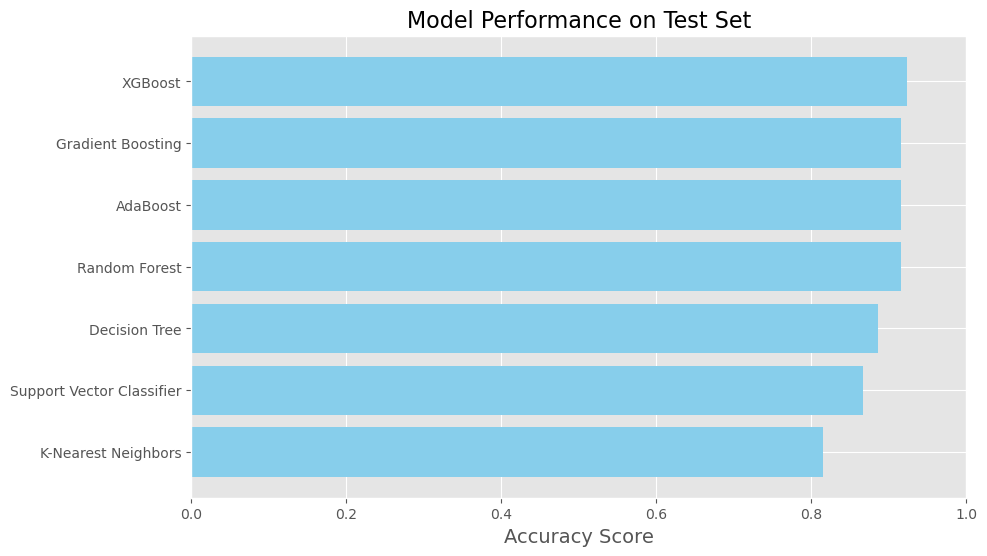

In [128]:
# List of model names for better visualization
model_names = [
    'K-Nearest Neighbors',
    'Support Vector Classifier',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'XGBoost'
]

# Initialize an empty list to store model scores
model_scores = []

# Using for loop for applying each model on x_test and y_test
for classifier in classifiers:
    classifier.fit(x_train, y_train)
    score = classifier.score(x_test, y_test)
    model_scores.append(score)
    print(classifier)
    print("Model score: %.3f" % score)

# Plotting the model performance
plt.figure(figsize=(10, 6))
plt.barh(model_names, model_scores, color='skyblue')
plt.xlabel('Accuracy Score', fontsize=14)
plt.title('Model Performance on Test Set', fontsize=16)
plt.xlim(0, 1)  # Since accuracy is between 0 and 1
plt.show()


In [131]:
# Initializing the knn with 1 neighbors
model_knn1 = KNeighborsClassifier(n_neighbors=1)

# Initializing the knn with 5 neighbors
model_knn5 = KNeighborsClassifier(n_neighbors=5)

# Fitting the model on data
model_knn1.fit(x_train, y_train)
model_knn5.fit(x_train, y_train)

# Testing the model on test set
pred_knn1 = model_knn1.predict(x_test)
pred_knn5 = model_knn5.predict(x_test)

print("Accuracy in knn with 1 neighbor:", accuracy_score(y_test, pred_knn1))
print("Classification report of model with knn: \n\n", classification_report(y_test, pred_knn1))
print("Accuracy in knn with 5 neighbor:", accuracy_score(y_test, pred_knn5))
print("Classification report of model with Logistic Regression: \n", classification_report(y_test, pred_knn5))


# Displaying the confusion matrix of the results
knn1_matrix = confusion_matrix(y_test, pred_knn1)
knn1_matrix

Accuracy in knn with 1 neighbor: 0.8616666666666667
Classification report of model with knn: 

               precision    recall  f1-score   support

           0       0.48      0.44      0.46       400
           1       0.92      0.93      0.92      2600

    accuracy                           0.86      3000
   macro avg       0.70      0.68      0.69      3000
weighted avg       0.86      0.86      0.86      3000

Accuracy in knn with 5 neighbor: 0.8816666666666667
Classification report of model with Logistic Regression: 
               precision    recall  f1-score   support

           0       0.66      0.23      0.34       400
           1       0.89      0.98      0.94      2600

    accuracy                           0.88      3000
   macro avg       0.78      0.60      0.64      3000
weighted avg       0.86      0.88      0.86      3000



array([[ 177,  223],
       [ 192, 2408]])

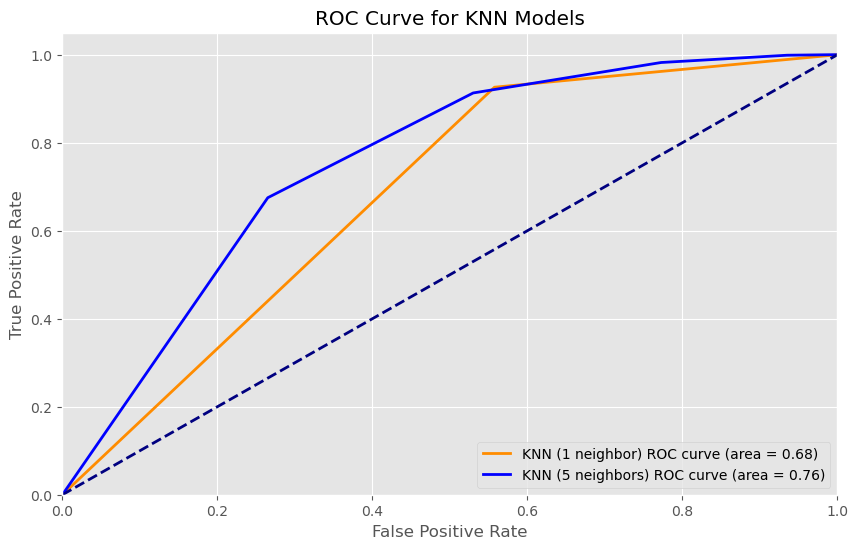

In [133]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
# Obtain the predicted probabilities for the positive class
# Since KNeighborsClassifier doesn't have a `predict_proba` method with n_neighbors=1, we'll skip plotting the ROC for n_neighbors=1, and focus on n_neighbors=5.
pred_knn1_proba = model_knn1.predict_proba(x_test)[:, 1]
pred_knn5_proba = model_knn5.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC for KNN with 1 neighbor
fpr_knn1, tpr_knn1, _ = roc_curve(y_test, pred_knn1_proba)
roc_auc_knn1 = auc(fpr_knn1, tpr_knn1)

# Compute ROC curve and AUC for KNN with 5 neighbors
fpr_knn5, tpr_knn5, _ = roc_curve(y_test, pred_knn5_proba)
roc_auc_knn5 = auc(fpr_knn5, tpr_knn5)

# Plotting the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_knn1, tpr_knn1, color='darkorange', lw=2, label=f'KNN (1 neighbor) ROC curve (area = {roc_auc_knn1:.2f})')
plt.plot(fpr_knn5, tpr_knn5, color='blue', lw=2, label=f'KNN (5 neighbors) ROC curve (area = {roc_auc_knn5:.2f})')

# Plotting a diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [134]:
model_knn5.predict(test_data)

array([1, 0, 0, ..., 1, 1, 1])

In [135]:
# Intializing the model
model_gnb = GaussianNB()

# Fit model on the data
model_gnb.fit(x_train, y_train)

# Making prediction on the test data
pred_gnb = model_gnb.predict(x_test)

print("Accuracy in Gaussian Naive Bayes:", accuracy_score(y_test, pred_gnb))
print('Classification report of Gaussian Naive Bayes: \n', classification_report(y_test, pred_gnb))

# Displaying the confusion matrix of the results
gnb_matrix = confusion_matrix(y_test, pred_gnb)

gnb_matrix

Accuracy in Gaussian Naive Bayes: 0.20833333333333334
Classification report of Gaussian Naive Bayes: 
               precision    recall  f1-score   support

           0       0.14      0.97      0.25       400
           1       0.96      0.09      0.17      2600

    accuracy                           0.21      3000
   macro avg       0.55      0.53      0.21      3000
weighted avg       0.85      0.21      0.18      3000



array([[ 389,   11],
       [2364,  236]])

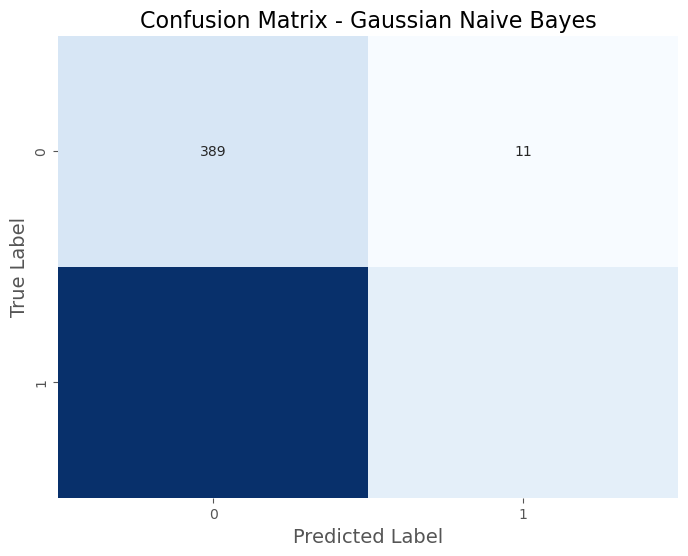

In [136]:
# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(gnb_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Gaussian Naive Bayes', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()


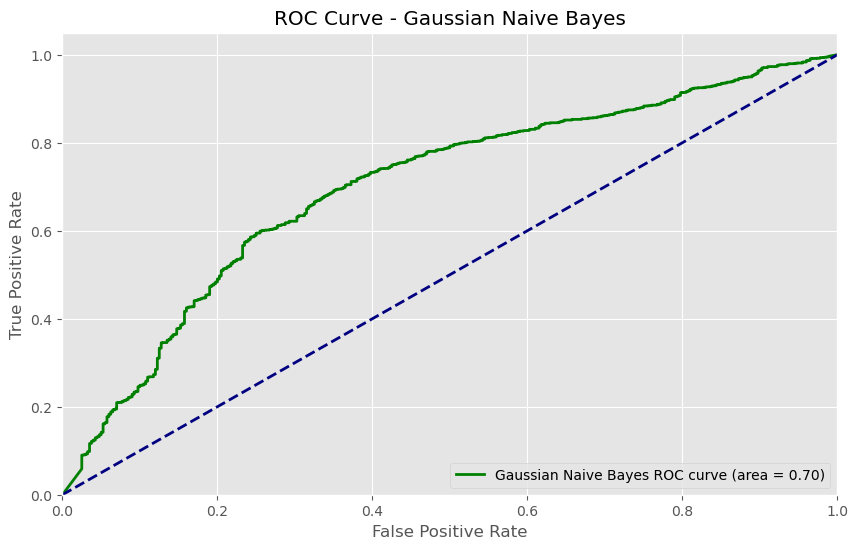

In [137]:
# Obtain the predicted probabilities for the positive class
pred_gnb_proba = model_gnb.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC for Gaussian Naive Bayes
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, pred_gnb_proba)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_gnb, tpr_gnb, color='green', lw=2, label=f'Gaussian Naive Bayes ROC curve (area = {roc_auc_gnb:.2f})')

# Plotting a diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [138]:
#Logistic Regression Model
model_lgr = LogisticRegression()

model_lgr.fit(x_train, y_train)

pred_lgr = model_lgr.predict(x_test)

print("Accuracy with Logistic Regression:", accuracy_score(y_test, pred_lgr))
print("Classification report of model with Logistic Regression: \n", classification_report(y_test, pred_lgr))
gnb_matrix = confusion_matrix(y_test, pred_lgr)
gnb_matrix

Accuracy with Logistic Regression: 0.9166666666666666
Classification report of model with Logistic Regression: 
               precision    recall  f1-score   support

           0       0.94      0.40      0.56       400
           1       0.92      1.00      0.95      2600

    accuracy                           0.92      3000
   macro avg       0.93      0.70      0.76      3000
weighted avg       0.92      0.92      0.90      3000



/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 161,  239],
       [  11, 2589]])

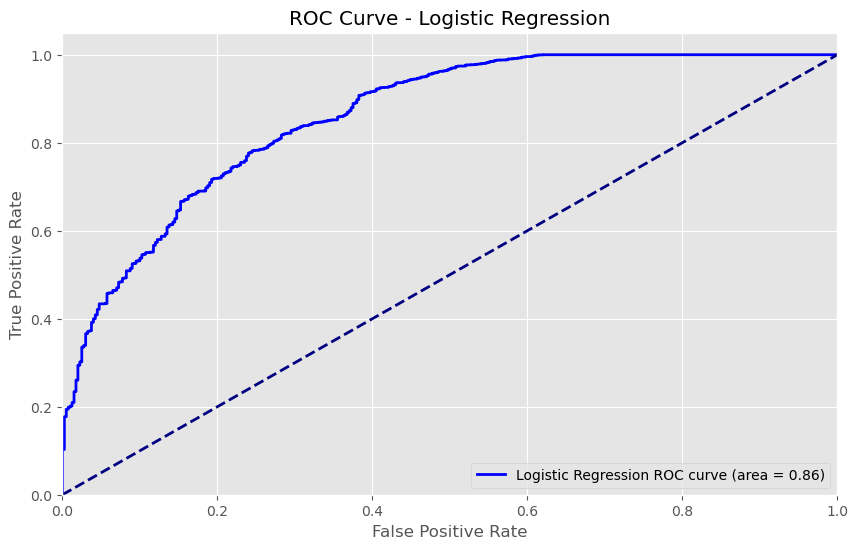

In [139]:
# Obtain the predicted probabilities for the positive class
pred_lgr_proba = model_lgr.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC for Logistic Regression
fpr_lgr, tpr_lgr, _ = roc_curve(y_test, pred_lgr_proba)
roc_auc_lgr = auc(fpr_lgr, tpr_lgr)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_lgr, tpr_lgr, color='blue', lw=2, label=f'Logistic Regression ROC curve (area = {roc_auc_lgr:.2f})')

# Plotting a diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [140]:
# Initializing the knn with 1 neighbors
model_knn1 = KNeighborsClassifier(n_neighbors=1)

# Initializing the knn with 5 neighbors
model_knn5 = KNeighborsClassifier(n_neighbors=5)

# Fitting the model on data
model_knn1.fit(x_train, y_train)
model_knn5.fit(x_train, y_train)

# Testing the model on test set
pred_knn1 = model_knn1.predict(x_test)
pred_knn5 = model_knn5.predict(x_test)

print("Accuracy in knn with 1 neighbor:", accuracy_score(y_test, pred_knn1))
print("Classification report of model with knn: \n\n", classification_report(y_test, pred_knn1))
print("Accuracy in knn with 5 neighbor:", accuracy_score(y_test, pred_knn5))
print("Classification report of model with Logistic Regression: \n", classification_report(y_test, pred_knn5))



# Displaying the confusion matrix of the results
knn1_matrix = confusion_matrix(y_test, pred_knn1)
knn1_matrix

Accuracy in knn with 1 neighbor: 0.8616666666666667
Classification report of model with knn: 

               precision    recall  f1-score   support

           0       0.48      0.44      0.46       400
           1       0.92      0.93      0.92      2600

    accuracy                           0.86      3000
   macro avg       0.70      0.68      0.69      3000
weighted avg       0.86      0.86      0.86      3000

Accuracy in knn with 5 neighbor: 0.8816666666666667
Classification report of model with Logistic Regression: 
               precision    recall  f1-score   support

           0       0.66      0.23      0.34       400
           1       0.89      0.98      0.94      2600

    accuracy                           0.88      3000
   macro avg       0.78      0.60      0.64      3000
weighted avg       0.86      0.88      0.86      3000



array([[ 177,  223],
       [ 192, 2408]])

In [158]:
#implementing ANN model
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initializing the ANN model
model_ann = Sequential()

# Adding the input layer and the first hidden layer
model_ann.add(Dense(units=64, activation='relu', input_dim=x_train.shape[1]))

# Adding the second hidden layer
model_ann.add(Dense(units=32, activation='relu'))

# Adding the output layer
model_ann.add(Dense(units=1, activation='sigmoid'))  # Use 'softmax' for multi-class classification

# Compiling the ANN model
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN model to the training set
model_ann.fit(x_train, y_train, batch_size=32, epochs=50)

# Predicting the Test set results
pred_ann = model_ann.predict(x_test)
pred_ann = (pred_ann > 0.5)  # For binary classification, thresholding the probabilities

# Evaluating the ANN model
print("Accuracy in ANN:", accuracy_score(y_test, pred_ann))
print("Classification report of ANN: \n", classification_report(y_test, pred_ann))

# Displaying the confusion matrix of the ANN results
ann_matrix = confusion_matrix(y_test, pred_ann)
print("Confusion Matrix of ANN:\n", ann_matrix)


Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - accuracy: 0.8608 - loss: 0.3855
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - accuracy: 0.9038 - loss: 0.2640
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - accuracy: 0.9169 - loss: 0.2321
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - accuracy: 0.9216 - loss: 0.2138
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - accuracy: 0.9253 - loss: 0.2066
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.9267 - loss: 0.1992
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.9333 - loss: 0.1789
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - accuracy: 0.9361 - loss: 0.1683
Epoch 9/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.9431 - loss: 0.1597
Epoch 10/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - accuracy: 0.9422 - loss: 0.1497
Epoch 11/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - accuracy: 0.9438 - loss: 0.1468
Epoch 12/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 

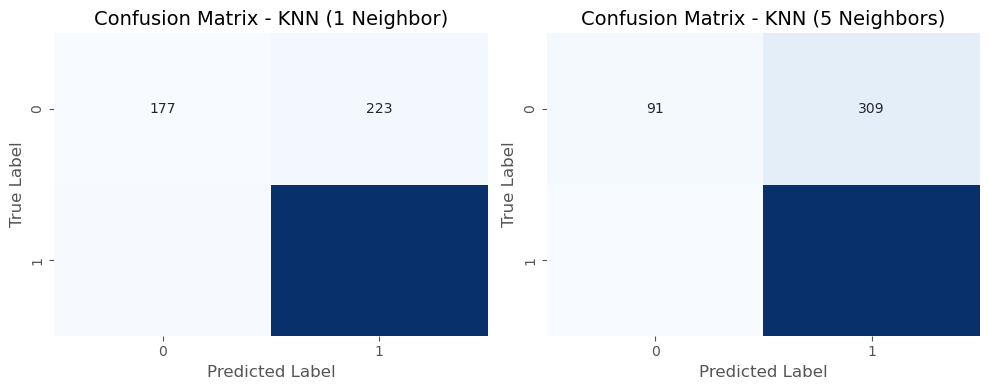

In [141]:
# Confusion matrix for KNN with 1 neighbor
knn1_matrix = confusion_matrix(y_test, pred_knn1)

# Confusion matrix for KNN with 5 neighbors
knn5_matrix = confusion_matrix(y_test, pred_knn5)

# Plotting confusion matrix for KNN with 1 neighbor
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(knn1_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - KNN (1 Neighbor)', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

# Plotting confusion matrix for KNN with 5 neighbors
plt.subplot(1, 2, 2)
sns.heatmap(knn5_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - KNN (5 Neighbors)', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

plt.tight_layout()
plt.show()


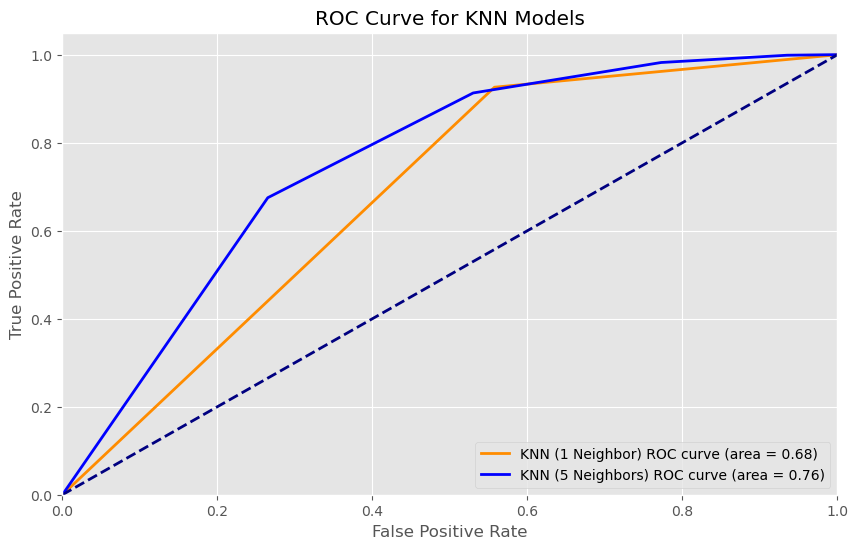

In [142]:
# Obtain the predicted probabilities for the positive class
pred_knn1_proba = model_knn1.predict_proba(x_test)[:, 1]
pred_knn5_proba = model_knn5.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC for KNN with 1 neighbor
fpr_knn1, tpr_knn1, _ = roc_curve(y_test, pred_knn1_proba)
roc_auc_knn1 = auc(fpr_knn1, tpr_knn1)

# Compute ROC curve and AUC for KNN with 5 neighbors
fpr_knn5, tpr_knn5, _ = roc_curve(y_test, pred_knn5_proba)
roc_auc_knn5 = auc(fpr_knn5, tpr_knn5)

# Plotting the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_knn1, tpr_knn1, color='darkorange', lw=2, label=f'KNN (1 Neighbor) ROC curve (area = {roc_auc_knn1:.2f})')
plt.plot(fpr_knn5, tpr_knn5, color='blue', lw=2, label=f'KNN (5 Neighbors) ROC curve (area = {roc_auc_knn5:.2f})')

# Plotting a diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [143]:
#Creating pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [144]:
steps = [("standard_scaler", StandardScaler()),
         ('classifier', DecisionTreeClassifier()),
        ]

pipe = Pipeline(steps)
pipe

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('classifier', DecisionTreeClassifier())])

In [145]:
pipe.fit(x_train, y_train)

# Making predictions
y_pred = pipe.predict(x_test)
y_pred


print("Accuracy decision tree:", accuracy_score(y_test, y_pred))
print("Classificatino report of Decision Tree: \n", classification_report(y_test, y_pred))

# Calculating AUC score
auc_score_tree = roc_auc_score(y_test, y_pred)

# Printing AUC score
print("AUC:", auc_score_tree)

Accuracy decision tree: 0.889
Classificatino report of Decision Tree: 
               precision    recall  f1-score   support

           0       0.58      0.58      0.58       400
           1       0.94      0.94      0.94      2600

    accuracy                           0.89      3000
   macro avg       0.76      0.76      0.76      3000
weighted avg       0.89      0.89      0.89      3000

AUC: 0.7572115384615385


In [146]:
# Initializing the xgb model
model_xgb = xgb.XGBClassifier()

# Fitting the model
model_xgb.fit(x_train,y_train)

# Making prediction on test data
pred_xgb = model_xgb.predict(x_test)

# Checking the accuracy
print("Accuracy XGBoost:", accuracy_score(y_test, pred_xgb))
print("Classification report of XGBoost: \n", classification_report(y_test, pred_xgb))

pred_xgb = model_xgb.predict(x_test)

# Calculate AUC score
auc_score_xgb = roc_auc_score(y_test, pred_xgb)

# Printing AUC score
print("AUC:", auc_score_xgb)

# Displaying the confusion matrix of the results
xgb_matrix = confusion_matrix(y_test, pred_xgb)
xgb_matrix

Accuracy XGBoost: 0.923
Classification report of XGBoost: 
               precision    recall  f1-score   support

           0       0.90      0.47      0.62       400
           1       0.92      0.99      0.96      2600

    accuracy                           0.92      3000
   macro avg       0.91      0.73      0.79      3000
weighted avg       0.92      0.92      0.91      3000

AUC: 0.7334615384615384


array([[ 190,  210],
       [  21, 2579]])

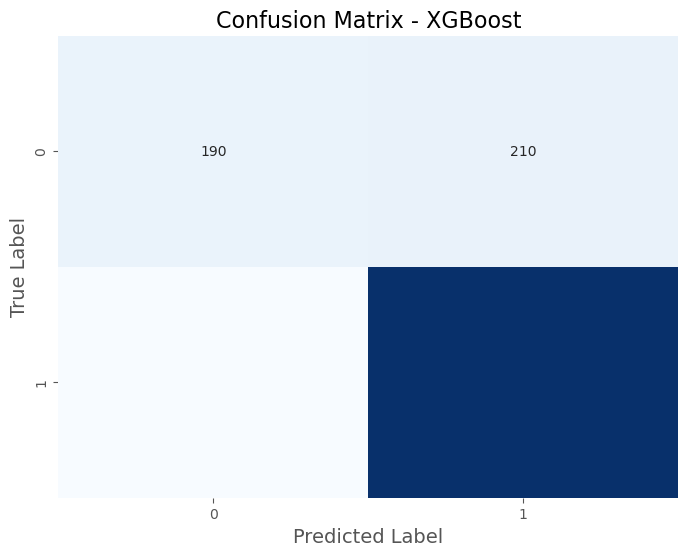

In [147]:
# Confusion matrix for XGBoost
xgb_matrix = confusion_matrix(y_test, pred_xgb)

# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - XGBoost', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()


Accuracy XGBoost: 0.923
Classification report of XGBoost: 
               precision    recall  f1-score   support

           0       0.90      0.47      0.62       400
           1       0.92      0.99      0.96      2600

    accuracy                           0.92      3000
   macro avg       0.91      0.73      0.79      3000
weighted avg       0.92      0.92      0.91      3000



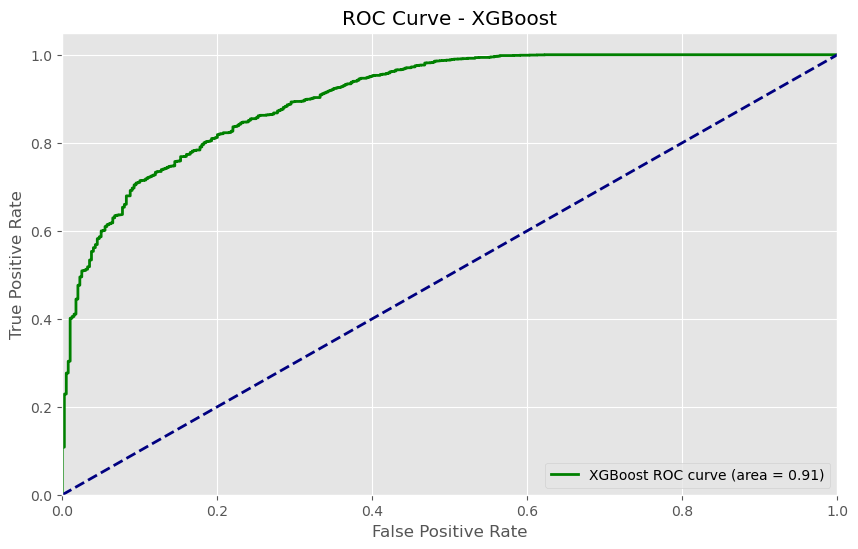

In [148]:
# Ensure the model is properly initialized and fitted
model_xgb = xgb.XGBClassifier()

# Fitting the model on the training data
model_xgb.fit(x_train, y_train)

# Making predictions on the test data
pred_xgb = model_xgb.predict(x_test)

# Checking the accuracy
print("Accuracy XGBoost:", accuracy_score(y_test, pred_xgb))
print("Classification report of XGBoost: \n", classification_report(y_test, pred_xgb))

# Obtain the predicted probabilities for the positive class
pred_xgb_proba = model_xgb.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, pred_xgb_proba)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label=f'XGBoost ROC curve (area = {roc_auc_xgb:.2f})')

# Plotting a diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [149]:
# Define the XGBoost classifier
model_xgb = xgb.XGBClassifier()

# Defining the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 4, 5],  # Depth of trees
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'gamma': [0, 0.1, 0.2]  # Minimum loss reduction required to make a further partition on a leaf node
}

# Performing GridSearchCV
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Getting the best parameters from the grid search
best_params = grid_search.best_params_

# Using the best parameters to create a new XGBoost model
best_model_xgb = xgb.XGBClassifier(**best_params)

# Fitting the model on the training data
best_model_xgb.fit(x_train, y_train)

# Making predictions on the test data
pred_xgb = best_model_xgb.predict(x_test)

# Printing accuracy and classification report
print("Accuracy XGBoost:", accuracy_score(y_test, pred_xgb))
print("Classification report of XGBoost: \n", classification_report(y_test, pred_xgb))

# Calculatting and print AUC score
auc_score_xgb = roc_auc_score(y_test, pred_xgb)
print("AUC:", auc_score_xgb)
GScvxgb_matrix = confusion_matrix(y_test, pred_xgb)

Accuracy XGBoost: 0.923
Classification report of XGBoost: 
               precision    recall  f1-score   support

           0       0.95      0.45      0.61       400
           1       0.92      1.00      0.96      2600

    accuracy                           0.92      3000
   macro avg       0.93      0.72      0.78      3000
weighted avg       0.92      0.92      0.91      3000

AUC: 0.7218269230769231


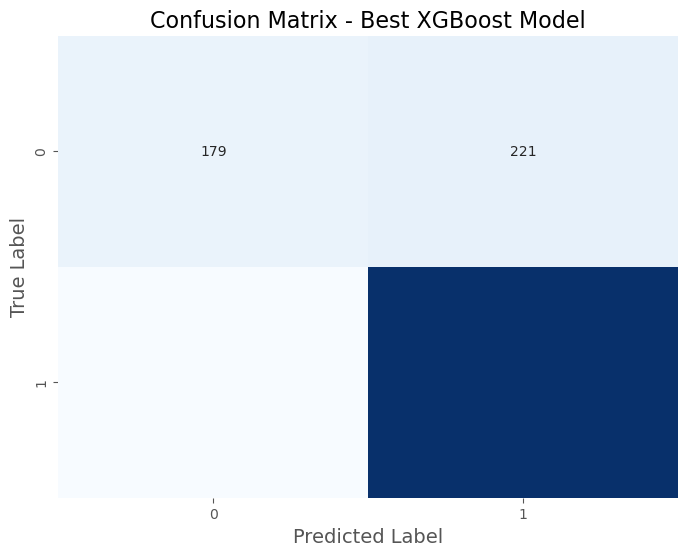

In [150]:
# Confusion matrix for the best XGBoost model
GScvxgb_matrix = confusion_matrix(y_test, pred_xgb)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(GScvxgb_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Best XGBoost Model', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()


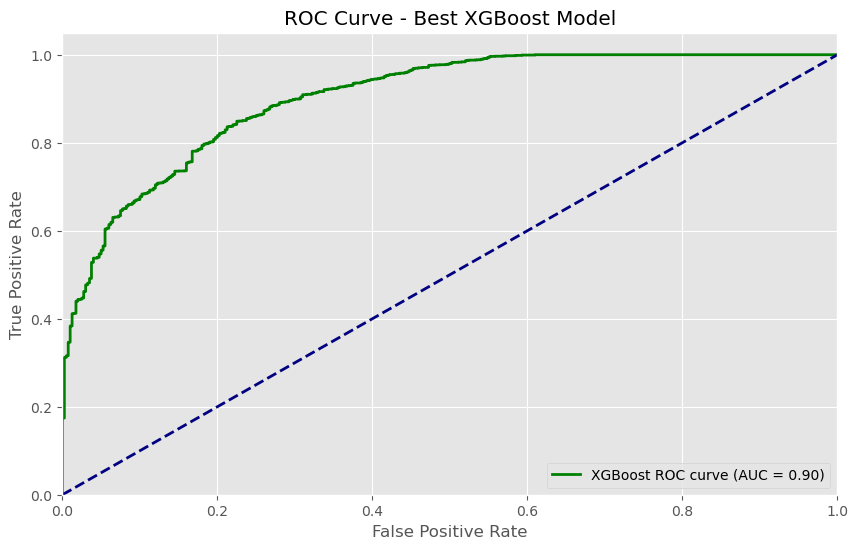

In [151]:
# Obtain the predicted probabilities for the positive class
pred_xgb_proba = best_model_xgb.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC for the best XGBoost model
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, pred_xgb_proba)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label=f'XGBoost ROC curve (AUC = {roc_auc_xgb:.2f})')

# Plotting a diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best XGBoost Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [153]:
#predicting using the XGB model
pred_xgb = best_model_xgb.predict(x_test)

In [154]:
#RandomForest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(test_data)

# AdaBoostClassifier
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(x_train, y_train)
ada_pred = ada_model.predict(test_data)

# GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(x_train, y_train)
gb_pred = gb_model.predict(test_data)

(array([ 292.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3664.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

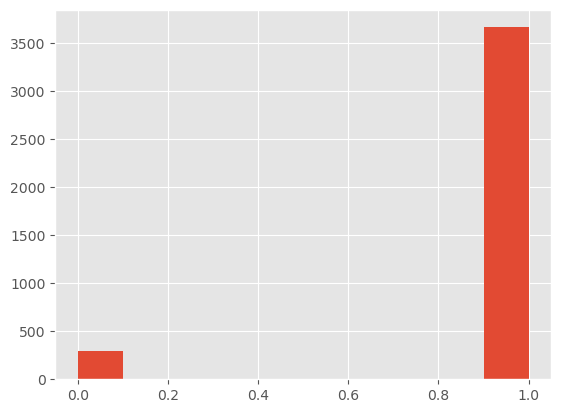

In [155]:
plt.hist(ada_pred)

(array([ 292.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3664.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

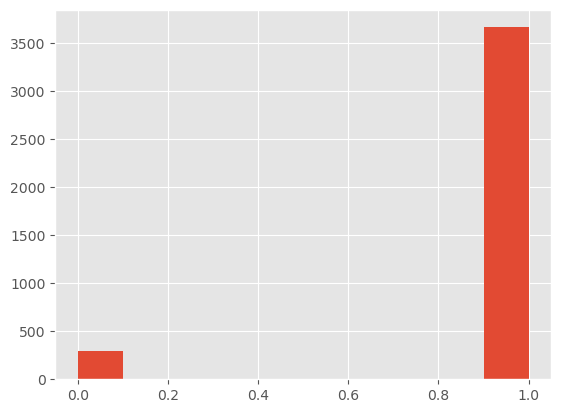

In [156]:
plt.hist(ada_pred)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


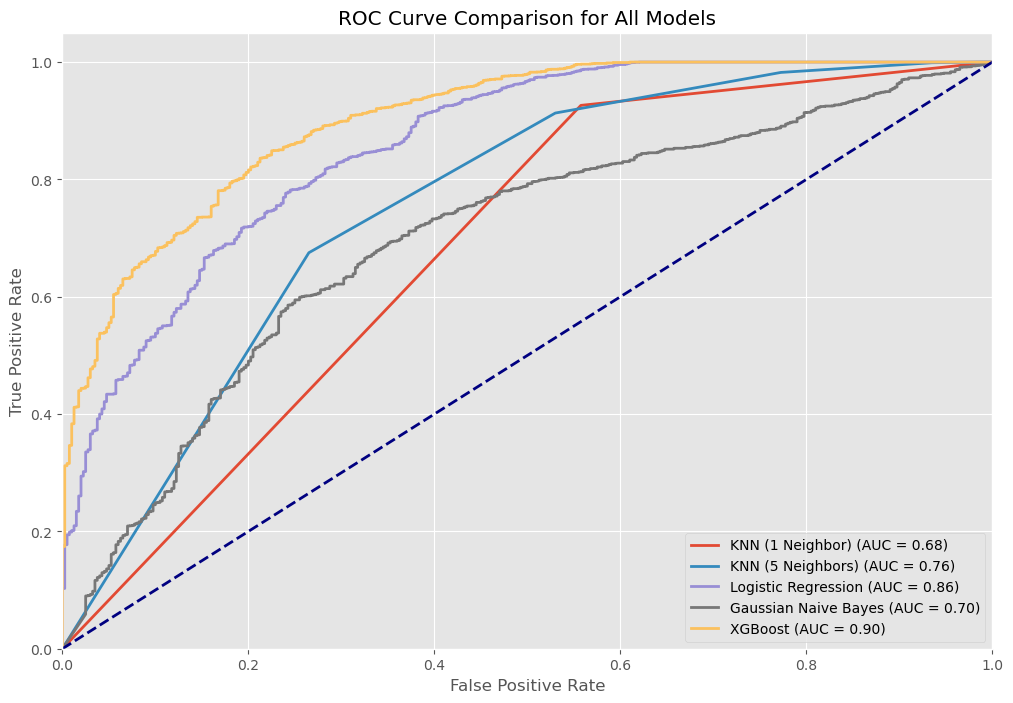

In [157]:
# Initialize the models
models = {
    'KNN (1 Neighbor)': KNeighborsClassifier(n_neighbors=1),
    'KNN (5 Neighbors)': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(),
    'Gaussian Naive Bayes': GaussianNB(),
    'XGBoost': best_model_xgb  # Use the best XGBoost model from GridSearchCV
}

# Fit models and compute ROC curves
plt.figure(figsize=(12, 8))

for name, model in models.items():
    model.fit(x_train, y_train)
    pred_proba = model.predict_proba(x_test)[:, 1]  # Get the probability for the positive class
    fpr, tpr, _ = roc_curve(y_test, pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plotting a diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Setting plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for All Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
